# ETL Pipelines Tutorial | World Bank Datasets 

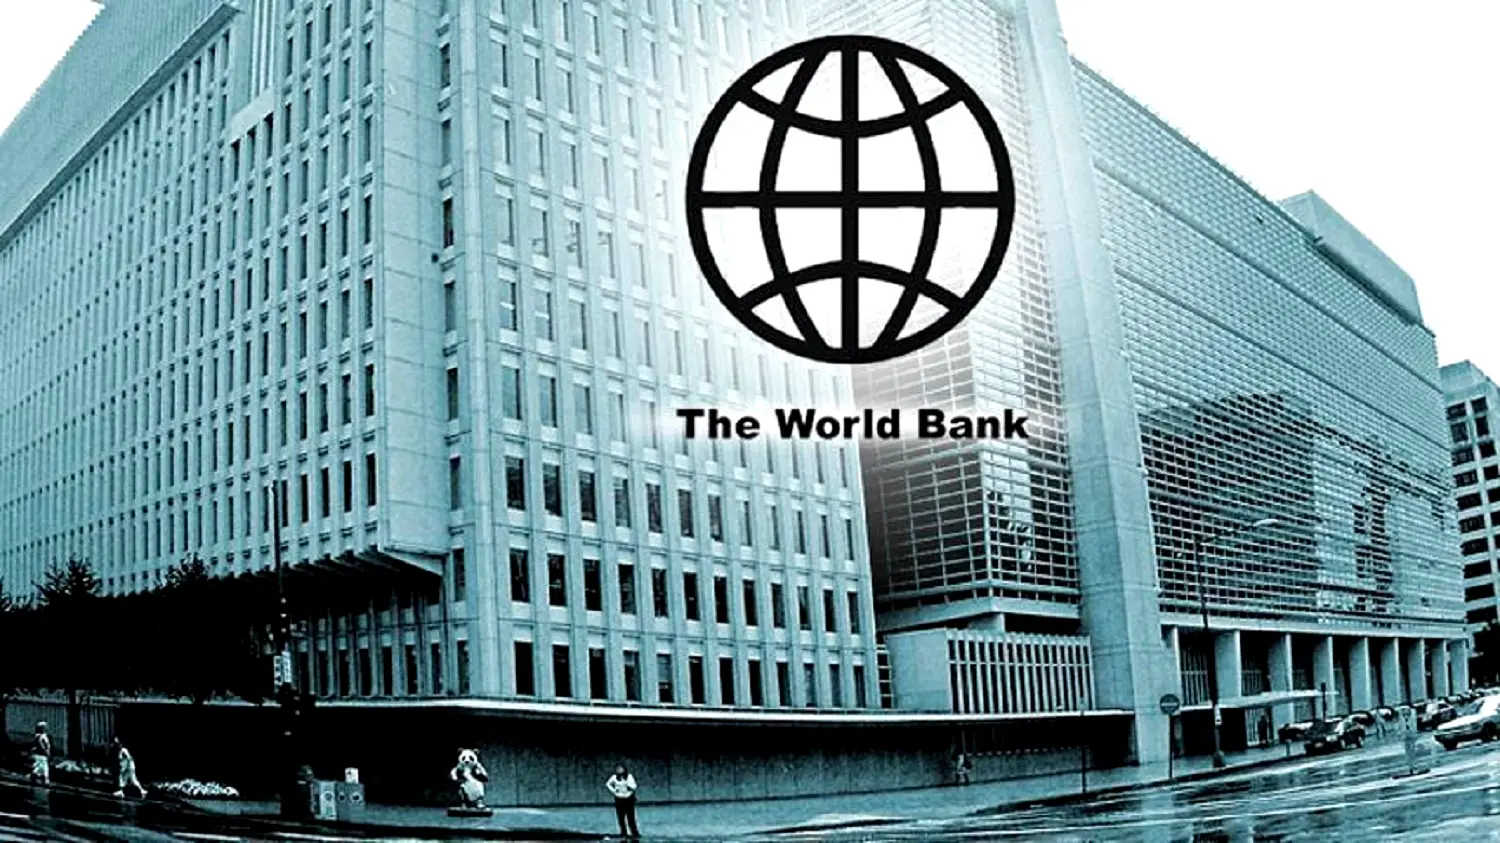

This notebook is a part of my learning journey which I've been documenting from Udacity's Data Scientist Nanodegree program, and DataCamp's Data Engineer Projects which helped me a lot to learn and excel advanced data science stuff such as PySpark. 


**ETL stands for Extract, Transform, Load.**

This lesson uses data from the World Bank. The data comes from two sources:

[World Bank Indicator Data](https://data.worldbank.org/indicator) - This data contains socio-economic indicators for countries around the world. A few example indicators include population, arable land, and central government debt.

[World Bank Project Data](https://datacatalog.worldbank.org/dataset/world-bank-projects-operations) - This data set contains information about World Bank project lending since 1947.

#### Outline of this notebook:
**Extract data from different sources such as:**

- csv files
- json files
- APIs

**Transform data**
- combining data from different sources
- data cleaning
- data types
- parsing dates
- file encodings
- missing data
- duplicate data
- dummy variables
- remove outliers
- scaling features
- engineering features

**Load**
- send the transformed data to a database

**ETL Pipeline**
- code an ETL pipeline

The end goal is to clean these data sets and bring them together into one table. As you'll see, it's not as easy as one might hope. By the end of the notebook, I'll have written an ETL pipeline to extract, transform, and load this data into a new database.

The goal of the notebook is to combine these data sets together so that you can run a machine learning model predicting World Bank Project total costs. 

In the process, you'll need to transform these data sets in different ways. And finally, you'll write a single Python module that reads in these date sets, transforms them, and loads the results into the database all in one step.

In [1]:
# Importing necessary libraries for the project
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Install the Kaggle library
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()                     # upload [kaggle.json]

In [4]:
# Make a folder named “.kaggle”
! mkdir ~/.kaggle

In [5]:
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [6]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
! unzip '/content/drive/MyDrive/Data Engineer/ETL Implementation/ETL Pipelines tutorial world-bank datasets.zip'

Archive:  /content/drive/MyDrive/Data Engineer/ETL Implementation/ETL Pipelines tutorial world-bank datasets.zip
  inflating: population_data.json    
  inflating: population_data.xml     
  inflating: projects_data.csv       
  inflating: rural_population_percent.csv  
  inflating: AGRI_land.csv           
  inflating: electricity_access_percent.csv  
  inflating: gdp_data.csv            
  inflating: mystery.csv             
  inflating: population_data.csv     
  inflating: population_data.db      


# Extract

### In the Extract part, I will extract data from 3 Sources, namely **CSV, JSON, APIs**


>  ##  **1.** Extracting data from a csv file

In [ ]:
# import the projects_data.csv file using the pandas library
df_projects = pd.read_csv('projects_data.csv')

# Run the cell below to see what the data looks like
df_projects.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [ ]:
# output the shape of the data frame
df_projects.shape

(18248, 57)

In [ ]:
# df_projects.dtypes

We got a dtype warning, Read about what this warning is in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.errors.DtypeWarning.html).

Pandas tries to figure out programatically the data type of each column (integer, float, boolean, string). In this case, pandas could not automatically figure out the data type. That is because some columns have more than one possible data types. In other words, this data is messy.

You can use the dtype option to specify the data type of each column. Because there are so many columns in this data set, you can set all columns to be strings at least for now.

Try reading in the data set again using the read_csv() method. This time, also use the option dtype=str so that pandas treats everything like a string.

In [ ]:
# Read in the projects_data.csv file using the read_csv method and dtype = str option
df_projects = pd.read_csv('projects_data.csv', dtype='str')
df_projects.dtypes         # as shown all columns datatype was converted to String/object

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [ ]:
# count the number of null values in the data set
df_projects.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

Notice that the number 18248 shows up multiple times. There is also a countryname column with 0 missing values and a Country column with 14045 missing values. This data set clearly has some issues that will need to be solved in the transform part of the pipeline.

Next, output the shape of the data frame

____
Next, use the pandas read_csv method to read in the population_data.csv file. When you try to read in this data set using pandas, you'll get an error because there is something wrong with the data.

In [ ]:
# read in the population_data.csv file using the read_csv() method

df_population = pd.read_csv('population_data.csv')

# Run the cell below to see what the data looks like
df_projects.head()

ParserError: ignored

What might have happened? Try printing out the first few lines of the data file to see what the issue might be.

In [ ]:
f = open('population_data.csv')
for i in range(10):
  line = f.readline()
  print(f'line {i}:', line)
f.close()        


line 0: ﻿"Data Source","World Development Indicators",

line 1: 

line 2: "Last Updated Date","2018-06-28",

line 3: 

line 4: "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line 5: "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94992","

The first four lines in the file are not properly formatted and don't contain data.

In [ ]:
# Read in population data skipping first four rows
df_population = pd.read_csv('population_data.csv', skiprows=4)
df_population.head()         # as shown the problem was solved and the table was displayed

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [ ]:
df_population.shape

(264, 63)

In [ ]:
# Count the number of null values in each column
df_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

It looks like every year column has at least one NaN value. 

In [ ]:
# Sum the null values by column
df_population.isnull().sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
259    1
260    1
261    1
262    1
263    1
Length: 264, dtype: int64

And it looks like almost every row has only one null value. That is probably from the 'Unnamed: 62' column that doesn't have any relevant information in it. Drop the 'Unnamed: 62' column from the data frame.

In [ ]:
# the [Unnamed: 62] column all it's value is Nan so i will drop it
df_population = df_population.drop('Unnamed: 62', axis=1)

In [ ]:
# This code outputs any row that contains a null value
# The purpose is to see what rows contain null values now that 
#  'Unnamed: 62' was dropped from the data.

df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
67,Eritrea,ERI,"Population, total",SP.POP.TOTL,1397491.0,1432640.0,1469645.0,1508273.0,1548187.0,1589179.0,...,4232636.0,4310334.0,4390840.0,4474690.0,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,KWT,"Population, total",SP.POP.TOTL,269618.0,301336.0,338296.0,379891.0,425235.0,473554.0,...,2652340.0,2818939.0,2998083.0,3191051.0,3395556.0,3598385.0,3782450.0,3935794.0,4052584.0,4136528.0
194,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0,4684777.0
212,Serbia,SRB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7095383.0,7058322.0,7022268.0
223,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,33964.0,34238.0,34056.0,33435.0,34640.0,36607.0,37685.0,38824.0,39969.0,41109.0


> ## **2.** Extract from JSON and XML

I'll extract the same population data, except the data will be in a different format.

Both JSON and XML are common formats for storing data. XML was established before JSON, and JSON has become more popular over time. They both tend to be used for sending data via web APIs, which I'll learn about later in the lesson.

Sometimes, you can obtain the same data in either JSON or XML format. The World Bank indicator data is available in either form

First, you'll practice extracting data from a JSON file.

In [ ]:
def print_lines(n, file_name):
    f = open(file_name)
    for i in range(n):
        print(f.readline())
    f.close()

In [ ]:
print_lines(5, 'population_data.json')

[

    {

        "Country Name": "Aruba",

        "Country Code": "ABW",

        "Indicator Name": "Population, total",



The first "line" in the file is actually the entire file. JSON is a compact way of representing data in a dictionary-like format. Luckily, pandas has a method to [read in a json file](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) and parse the results for you. 

If you open the link with the documentation, you'll see there is an *orient* option that can handle JSON formatted in different ways:
```
'split' : dict like {index -> [index], columns -> [columns], data -> [values]}

'records' : list like [{column -> value}, ... , {column -> value}]

'index' : dict like {index -> {column -> value}}

'columns' : dict like {column -> {index -> value}}

'values' : just the values array
```

In this case, the JSON is formatted with a 'records' orientation, so you'll need to use that value in the read_json() method. You can tell that the format is 'records' by comparing the pattern in the documentation with the pattern in the JSON file.

Next, read in the population_data.json file using pandas.

In [ ]:
# Read in the population_data.json file using pandas's 
# read_json method. Don't forget to specific the orient option
# store the results in df_json

df_json = pd.read_json('population_data.json', orient='records')
df_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [ ]:
df_json.shape

(264, 62)

### Other Ways to Read in JSON

Besides using pandas to read JSON files, you can use the json library. Python treats JSON data like a dictionary.

In [ ]:
import json

# read in the JSON file
with open('population_data.json') as f:
    json_data = json.load(f)

# read the first record in the JSON file
print(json_data[0])
print(json_data[1])
print(json_data[2])
print('\n')

# show that JSON data is essentially a dictionary
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])

{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

> ## Extract XML

In [ ]:
print_lines(15, 'population_data.xml')

﻿<?xml version="1.0" encoding="utf-8"?>

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>



XML looks very similar to HTML. XML is formatted with tags having values inside the tags. XML is not as easy to navigate as JSON. Pandas cannot read in XML directly. One reason is that tag names are user defined. Every XML file might have different formatting. You can imagine why XML has fallen out of favor relative to JSON.

### How to read and navigate XML

There is a Python library called BeautifulSoup, which makes reading in and parsing XML data easier. Here is the link to the documentation: [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/)

The find() method will find the first place where an xml element occurs. For example using find('record') will return the first record in the xml file:

```xml
<record>
  <field name="Country or Area" key="ABW">Aruba</field>
  <field name="Item" key="SP.POP.TOTL">Population, total</field>
  <field name="Year">1960</field>
  <field name="Value">54211</field>
</record>
```

The find_all() method returns all of the matching tags. So find_all('record') would return all of the elements with the `<record>` tag.


In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the BeautifulSoup library
from bs4 import BeautifulSoup

# open the population_data.xml file and load into Beautiful Soup
with open("population_data.xml") as fp:
    soup = BeautifulSoup(fp,"lxml")      #lxml is the parser type

In [ ]:
# output the first 5 records in the xml file
# this is an example of how to navigate the XML document with BeautifulSoup

i = 0
# use the find_all method to get all record tags in the document
for record in soup.find_all('record'):
    # use the find_all method to get all fields in each record
    i += 1
    for field in record.find_all('field'):
        print(field['name'], ': ' , field.text)
    print()
    if i == 5:
        break

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



> ## Extract Data from SQL Databases


___
### Connecting to Databases
- Two-step process:
    1. Create way to connect to database
    2. Query database
    _________

### Pandas and sqlite3

You can use Pandas to open a SQL database or to run a SQL query against a database. There is more than one way to do this depending on the type of SQL database you are working with: the [sqlite3 library](https://www.sqlite.org/about.html) or the [sqlalchemy library](https://www.sqlalchemy.org/).


In [ ]:
import sqlite3

#connection to the database 
conn = sqlite3.connect('population_data.db')

#run a query
print( pd.read_sql('SELECT COUNT(*) AS "Count of rows" FROM population_data', conn) )   # print the count of rows
print()
pd.read_sql('SELECT * FROM population_data', conn)

   Count of rows
0            264



,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [ ]:
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

,Country_Name,Country_Code,1960
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0
...,...,...,...
259,Kosovo,XKX,947000.0
260,"Yemen, Rep.",YEM,5172135.0
261,South Africa,ZAF,17456855.0
262,Zambia,ZMB,3044846.0


## SQLAlchemy and Pandas

If you are working with a different type of database such as MySQL or PostgreSQL, you can use the SQLAlchemy library with pandas. Here are the instructions for connecting to [different types of databases using SQLAlchemy](http://docs.sqlalchemy.org/en/latest/core/engines.html).


In [ ]:
# Load sqlalchemy's create_engine
from sqlalchemy import create_engine

### 
# Create database engine to manage connections
# to find the correct file path, use the python os library:
# import os
# print(os.getcwd())
#
###
engine = create_engine("sqlite:///population_data.db")          # my file name is [population_data.db] so must write   'sqlite:///population_data.db'

# View all tables in the database  --  [population_data] هلاقي اني معنديش غير جدول واحد أسمه
engine.table_names()

# Load entire weather table by table name
df = pd.read_sql("population_data", engine)           # population_data --> is a table from this database
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [ ]:
pd.read_sql('SELECT COUNT(*) FROM population_data', engine)

,COUNT(*)
0,264


In [ ]:
query= ''' 
    SELECT Country_Name, MAX(2008), MIN(2010), SUM(1960)
    FROM population_data 
    GROUP BY Country_Name; '''
pd.read_sql(query, engine).head()

,Country_Name,MAX(2008),MIN(2010),SUM(1960)
0,Afghanistan,2008,2010,1960
1,Albania,2008,2010,1960
2,Algeria,2008,2010,1960
3,American Samoa,2008,2010,1960
4,Andorra,2008,2010,1960


> ## APIs 

### Example Indicators API

Run the code example below to request data from the World Bank Indicators API. According to the documntation, you format your request url like so:

`http://api.worldbank.org/v2/countries/` + list of country abbreviations separated by ; + `/indicators/` + indicator name + `?` + options

where options can include
* per_page - number of records to return per page
* page - which page to return - eg if there are 5000 records and 100 records per page
* date - filter by dates
* format - json or xml
 
 and a few other options that you can read about [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure).

In [ ]:
import requests
import pandas as pd

url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
response = requests.get(url)

# Isolate the JSON data from the response object
data= response.json()
data

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 248,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2022-09-16'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 213993441,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   'value': 212559409,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2019',
   'value': 211049519,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},

This json data isn't quite ready for a pandas data frame. Notice that the json response is a list with two entries. The first entry is 
```
{'lastupdated': '2018-06-28',
  'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 232}
```

That first entry is meta data about the results. For example, it says that there is one page returned with 232 results. 

The second entry is another list containing the data. This data would need some cleaning to be used in a pandas data frame. That would happen later in the transformation step of an ETL pipeline. Run the cell below to read the results into a dataframe and see what happens.

In [ ]:
# Load the first table from the response json file
first_collection = pd.DataFrame(data[1])       
first_collection.head(3)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,213993441,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,212559409,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,211049519,,,0


There are some issues with this dataframe. The country and indicator variables don't look particularly useful in their current form. Again, dealing with those issues would come in the transformation phase of a pipeline.

Use the Indicators API to request rural population data for Switzerland in the years 1995 through 2001. Here are a few helpful resources:
* [documentation included how to filter by year](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure)
* [2-character iso country codes](https://www.nationsonline.org/oneworld/country_code_list.htm)
* [search box for World Bank indicators](https://data.worldbank.org)

To find the indicator code, first search for the indicator here: https://data.worldbank.org
Click on the indicator name. The indicator code is in the url. For example, the indicator code for total population is SP.POP.TOTL, which you can see in the link [https://data.worldbank.org/indicator/SP.RUR.TOTL](https://data.worldbank.org/indicator/SP.RUR.TOTL).

In [ ]:
# TODO: get the url ready
url = 'http://api.worldbank.org/v2/country/CH/indicator/SP.POP.TOTL/?format=json&date=1995:2001'

# TODO: send the request
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 7,
  'sourceid': '2',
  'sourcename': 'World Development Indicators',
  'lastupdated': '2022-09-16'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2001',
   'value': 7229854,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2000',
   'value': 7184250,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '1999',
   'value': 7143991,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'CH', 'value': 'Swit

# Transform

> ## Combining Data

There are two csv files:
* rural_population_percent.csv
* electricity_access_percent.csv

They both come from the World Bank Indicators data. 
* https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS
* https://data.worldbank.org/indicator/EG.ELC.ACCS.ZS

The rural populaton data represents the percent of a country's population that is rural over time. The electricity access data shows the percentage of people with access to electricity.

I will combine these two data sets together into one pandas data frame.

Combine the two data sets using the [pandas concat method](https://pandas.pydata.org/pandas-docs/stable/merging.html). In other words, find the union of the two data sets.

In [ ]:
df_rural= pd.read_csv('rural_population_percent.csv')
df_rural

ParserError: ignored

In [ ]:
f = open("rural_population_percent.csv")
for i in range(10):
    line = f.readline()
    print(f'line {i}:', line)
f.close()


line 0: ﻿"Data Source","World Development Indicators",

line 1: 

line 2: "Last Updated Date","2018-06-28",

line 3: 

line 4: "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line 5: "Aruba","ABW","Rural population (% of total population)","SP.RUR.TOTL.ZS","49.224","49.239","49.254","49.27","49.285","49.3","49.315","49.33","49.346","49.361","49.376","49.391","49.407","49.422","49.437","49.452","49.468","49.483","49.498","49.513","49.528","49.544","49.559","49.574","49.589","49.605","49.62","49.635","49.65","49.665","49.681","49.696","50.002","50.412","50.823","51.233","

In [ ]:
df_rural = pd.read_csv('rural_population_percent.csv', skiprows=4)
df_rural.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [ ]:
f = open("electricity_access_percent.csv")
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()


line:  0 ﻿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Access to electricity (% of population)","EG.ELC.ACCS.ZS","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","88.4453506469727","88.7808456420898","89.1158294677734","89.44775390625","89.7735595703125","90.0901870727539","90.3945846557617","90.6836776733398","90.9544219970703","91.2037506103516","91.6603980031457","91.6380920410156

In [ ]:
df_electricity = pd.read_csv('electricity_access_percent.csv',skiprows=4)
df_electricity.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


remove the `Unnamed:62` column from each data set

In [ ]:
df_rural.drop(['Unnamed: 62'],axis=1,inplace=True)

In [ ]:
df_electricity.drop(['Unnamed: 62'],axis=1,inplace=True)

In [ ]:
df_rural.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [ ]:
df = pd.concat([df_rural, df_electricity])

In [ ]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [ ]:
print(df_rural.shape)
print(df_electricity.shape)

(264, 62)
(264, 62)


In [ ]:
df.shape         # so the df= 264 + 264= 528

(528, 62)

> ## Cleaning Data

#### Cleaning بعد كده مرحلة الـ

Every data set might have its own issues whether that involves missing values, duplicated entries, data entry mistakes, etc. In this notebook, I'll do some data cleaning on the World Bank projects and World Bank indicators data sets.

Currently, the projects data and the indicators data have different values for country names. My task in this notebook is to clean both data sets so that they have consistent country names. This will allow you to join the two data sets together. Cleaning data, unfortunately, can be tedious and take a lot of your time as a data scientist.

Why might you want to join these data sets together? What if, for example, you wanted to run linear regression to try to predict project costs based on indicator data? Or you might want to analyze the types of projects that get approved versus the indicator data. For example, do countries with low rates of rural electrification have more rural themed projects?

In [ ]:
df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [ ]:
df_indicator.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0


In [ ]:
df_projects.head(2)

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The next code cell outputs the unique country names and ISO abbreviations in the population indicator data set. You'll notice a few values that represent world regions such as 'East Asia & Pacific' and 'East Asia & Pacific (excluding high income)'.

In [ ]:
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


Run the next code cell to see the unique country names in the project data set. Notice that the projects data has two columns for country name. One is called 'countryname' and the other is called 'Country'. The 'Country' column only has NaN values.

Another thing of note: It would've been easier to join the two data sets together if the projects data had the [ISO country abbreviations](https://en.wikipedia.org/wiki/ISO_3166-1) like the indicator data has. Unfortunately, the projects data does not have the ISO country abbreviations. To join these two data sets together, you essentially have two choices:
* add a column of ISO 3 codes to the projects data set
* find the difference between the projects data country names and indicator data country names. Then clean the data so that they are the same.

Run the code cell below to see what the project countries look like:

In [ ]:
df_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

Did you notice a pattern in the projects data country names? The entries are repeated and separated by a semi-colon like this:

```text
'Kingdom of Spain;Kingdom of Spain'
'New Zealand;New Zealand'
```

The first step is to clean the country name column and get rid of the semi-colon.

In [ ]:
df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)

In [ ]:
# install and import the pycountry library
!pip install pycountry
from pycountry import countries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=a0aa156ab622831c1e7e970863991bc701a3b04c1774ae1725d214e97fc5686b
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# Run this code cell to see an example of how the library works
countries.get(name='Spain')         


Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [ ]:
# Run this code cell to see how you can also look up countries without specifying the key
countries.lookup('Kingdom of Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

The goal is to add the ISO codes to the projects data set. To start, use the pycountry library to make a dictionary mapping the unique countries in 'Official Country Name' to the ISO code.

Iterate through the unique countries in df_projects['Official Country Name']. Create a dictionary mapping the 'Country Name' to the alpha_3 ISO abbreviations. 

The dictionary should look like:
`{'Kingdom of Spain':'ESP'}`

If a country name cannot be found in the pycountry library, add it to a list called `country_not_found`.

In [ ]:
# set up the libraries and variables
from collections import defaultdict                # to create empty dictionary
country_not_found = []                             # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str)     # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

Quite a few country names were not in the pycountry library. Some of these are regions like "South Asia" or "Southern Africa", so it makes sense that these would not show up in the pycountry library.

Part 3 - Making a Manual Mapping

Perhaps some of these missing df_projects countries are already in the indicators data set. In the next cell, check if any of the countries in the country_not_found list are in the indicator list of countries.

In [ ]:
# Run this cell to iterate through the country_not_found list and check if the country name is in the df_indicator data set
indicator_countries = df_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


In [ ]:
print(indicator_countries[indicator_countries['Country Name'] == 'South Asia'], '\n')
print(indicator_countries[indicator_countries['Country Name'] == 'St. Kitts and Nevis'], '\n')
print(indicator_countries[indicator_countries['Country Name'] == 'St. Lucia'], '\n')
print(indicator_countries[indicator_countries['Country Name'] == 'St. Vincent and the Grenadines'], '\n')
print(indicator_countries[indicator_countries['Country Name'] == 'West Bank and Gaza'], '\n')
print(indicator_countries[indicator_countries['Country Name'] == 'World'])

    Country Name Country Code
202   South Asia          SAS 

            Country Name Country Code
123  St. Kitts and Nevis          KNA 

    Country Name Country Code
131    St. Lucia          LCA 

                       Country Name Country Code
251  St. Vincent and the Grenadines          VCT 

           Country Name Country Code
194  West Bank and Gaza          PSE 

    Country Name Country Code
257        World          WLD


Unfortunately, there aren't too many country names that match between df_indicator and df_projects. This is where data cleaning becomes especially tedious, but in this case, we've done a lot of the work for you.

We've manually created a dictionary that maps all of the countries in country_not_found to the ISO-3 alpha codes. You **could** try to do this programatically using some sophisticated string matching rules. That might be worth your time for a larger data set. But in this case, it's probably faster to type out the dictionary.

In [ ]:
country_not_found_mapping = {'South Asia': 'SAS',
             'St. Kitts and Nevis':'KNA',
             'St. Lucia':'LCA',
             'St. Vincent and the Grenadines':'VCT',
             'West Bank and Gaza':'PSE',
             'World': 'WLD'}

In [ ]:
project_country_abbrev_dict

defaultdict(str,
            {'American Samoa': 'ASM',
             'Antigua and Barbuda': 'ATG',
             'Arab Republic of Egypt': 'EGY',
             'Argentine Republic': 'ARG',
             'Barbados': 'BRB',
             'Belize': 'BLZ',
             'Bosnia and Herzegovina': 'BIH',
             'Burkina Faso': 'BFA',
             'Central African Republic': 'CAF',
             'Commonwealth of Dominica': 'DMA',
             'Commonwealth of The Bahamas': 'BHS',
             'Czech Republic': 'CZE',
             'Democratic Republic of Timor-Leste': 'TLS',
             'Dominican Republic': 'DOM',
             'Federal Democratic Republic of Ethiopia': 'ETH',
             'Federal Republic of Nigeria': 'NGA',
             'Federated States of Micronesia': 'FSM',
             'Federative Republic of Brazil': 'BRA',
             'French Republic': 'FRA',
             'Gabonese Republic': 'GAB',
             'Georgia': 'GEO',
             'Grand Duchy of Luxembourg': 'LUX',
    

____
Next, update the project_country_abbrev_dict variable with these new values.

____

In [ ]:
# Update the project_country_abbrev_dict with the country_not_found_mapping dictionary
# HINT: This is relatively straightforward. Python dictionaries have a method called update(), which essentially
# appends a dictionary to another dictionary

project_country_abbrev_dict.update(country_not_found_mapping)

In [ ]:
project_country_abbrev_dict

defaultdict(str,
            {'American Samoa': 'ASM',
             'Antigua and Barbuda': 'ATG',
             'Arab Republic of Egypt': 'EGY',
             'Argentine Republic': 'ARG',
             'Barbados': 'BRB',
             'Belize': 'BLZ',
             'Bosnia and Herzegovina': 'BIH',
             'Burkina Faso': 'BFA',
             'Central African Republic': 'CAF',
             'Commonwealth of Dominica': 'DMA',
             'Commonwealth of The Bahamas': 'BHS',
             'Czech Republic': 'CZE',
             'Democratic Republic of Timor-Leste': 'TLS',
             'Dominican Republic': 'DOM',
             'Federal Democratic Republic of Ethiopia': 'ETH',
             'Federal Republic of Nigeria': 'NGA',
             'Federated States of Micronesia': 'FSM',
             'Federative Republic of Brazil': 'BRA',
             'French Republic': 'FRA',
             'Gabonese Republic': 'GAB',
             'Georgia': 'GEO',
             'Grand Duchy of Luxembourg': 'LUX',
    

Part 5 - Make a 'Country Code' Column

Next, create a 'Country Code' column in the data_projects data frame. Use the project_country_abbrev_dict and df_projects['Country Name'] column to create a new columns called 'Country 'Code'.

In [ ]:
# Use the project_country_abbrev_dict and the df_projects['Country Name'] column to make a new column
# of the alpha-3 country codes. This new column should be called 'Country Code'.

# HINT: Use the apply method and a lambda function
# HINT: The lambda function will use the project_country_abbrev_dict that maps the country name to the ISO code
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])

In [ ]:
# Run this code cell to see which projects in the df_projects data frame still have no country code abbreviation.
# In other words, these projects do not have a matching population value in the df_indicator dataframe.
df_projects[df_projects['Country Code'] == '']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islamic Republic of Afghanistan,
10,P163721,South Asia,Democratic Socialist Republic of Sri Lan;Democ...,PE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Socialist Republic of Sri Lan,
16,P166734,East Asia and Pacific,Republic of the Union of Myanmar;Republic of t...,RE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of the Union of Myanmar,
26,P160162,East Asia and Pacific,Socialist Republic of Vietnam;Socialist Republ...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Socialist Republic of Vietnam,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18197,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia;Socia...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Socialist Federal Republic of Yugoslavia,
18200,P003006,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democratic Republic of the Congo,
18219,P008109,Latin America and Caribbean,Oriental Republic of Uruguay;Oriental Republic...,PE,Sector Investment and Maintenance Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oriental Republic of Uruguay,
18220,P037342,East Asia and Pacific,Commonwealth of Australia;Commonwealth of Aust...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Commonwealth of Australia,


Now the df_projects dataframe and the df_indicator dataframe have a matching column called 'Country Code'. But these two data frames can't be merged quite yet. 

Each project in the df_projects dataframe also has a date associated with it. The idea would be to merge the df_projects dataframe with the df_indicator dataframe so that each project also had a population value associated with it. There are still more data transformations to do in order for that to be possible. 

>## Data Types

When reading in a data set, pandas will try to guess the data type of each column like float, integer, datettime, bool, etc. In Pandas, strings are called "object" dtypes. 

However, Pandas does not always get this right. That was the issue with the World Bank projects data. Hence, the dtype was specified as a string:
```
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
```

Run the code cells below to read in the indicator and projects data. Then run the following code cell to see the dtypes of the indicator data frame.

In [ ]:
import pandas as pd

# read in the population data and drop the final column
df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [ ]:
df_indicator.dtypes         # as shown every column has it's own datatype

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

These results look reasonable. Country Name, Country Code, Indicator Name and Indicator Code were all read in as strings. The year columns, which contain the population data, were read in as floats.

Since the population indicator data was read in correctly, you can run calculations on the data. In this first exercise, sum the populations of the United States, Canada, and Mexico by year.

In [ ]:
# Calculate the population sum by year for [Canada, United States, and Mexico].

# the keepcol variable makes a list of the column names to keep. You can use this if you'd like
keepcol = ['Country Name']
for i in range(1960, 2018):
    keepcol.append(str(i))

# In the df_nafta variable, store a data frame that only contains the rows for 
#      Canada, United States, and Mexico.
df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') | 
             (df_indicator['Country Name'] == 'United States') | 
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]


# Calculate the sum of the values in each column in order to find the total population by year.
# You can use the keepcol variable if you want to control which columns get outputted
df_nafta.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1960                          236754121.0
1961                          241356126.0
1962                          245801588.0
1963                          250145880.0
1964                          254478272.0
1965                          258604043.0
1966                          262619038.0
1967                          266553812.0
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          3294

Now, run the code cell below to look at the dtypes for the projects data set. They should all be "object" types, ie strings, because that's what was specified in the code when reading in the csv file. As a reminder, this was the code:
```
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
```

In [ ]:
df_projects.dtypes        # as shown the all columns is string/object dtype because we used dtype=str

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [ ]:
pd.set_option('max_columns', None)         # this option to see all columns of dataframe
df_projects.head(3)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,status,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency,url,projectdoc,majorsector_percent,sector1,sector2,sector3,sector4,sector5,sector,mjsector1,mjsector2,mjsector3,mjsector4,mjsector5,mjsector,theme1,theme2,theme3,theme4,theme5,theme,goal,financier,mjtheme1name,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,Active,Creating a Trade in Value-Added Database for ...,2018-06-28T00:00:00Z,June,NaN,"500,000",0,0,0,"500,000",NaN,NaN,http://projects.worldbank.org/P162228?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,Active,Productive Inclusion Project,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z,"200,000,000",0,"200,000,000","200,000,000",0,NaN,NaN,http://projects.worldbank.org/P163962?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,Active,Additional Financing for Health Sector Support...,2018-06-28T00:00:00Z,June,NaN,"50,000,000",0,"58,330,000","58,330,000",0,NaN,NaN,http://projects.worldbank.org/P167672?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Many of these columns should be strings, so there's no problem; however, a few columns should be other data types. For example, `boardapprovaldate` should be a datettime and `totalamt` should be an integer. You'll learn about datetime formatting in the next part of the lesson. For this exercise, focus on the 'totalamt' and 'lendprojectcost' columns. Run the code cell below to see what that data looks like

In [ ]:
df_projects[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].head()

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
0,"500,000",0,0,0,"500,000"
1,"200,000,000",0,"200,000,000","200,000,000",0
2,"50,000,000",0,"58,330,000","58,330,000",0
3,"50,000,000",0,"20,000,000","20,000,000",0
4,"100,000,000",0,"100,000,000","100,000,000",0


What just happened? Pandas treated the totalamts like strings. In Python, adding strings concatenates the strings together.

There are a few ways to remedy this. When using pd.read_csv(), you could specify the column type for every column in the data set. The pd.read_csv() dtype option can accept a dictionary mapping each column name to its data type. You could also specify the `thousands` option with `thousands=','`. This specifies that thousands are separated by a comma in this data set. 

However, this data is somewhat messy, contains missing values, and has a lot of columns. It might be faster to read in the entire data set with string types and then convert individual columns as needed. For this next exercise, convert the `totalamt` column from a string to an integer type.

In [ ]:
# Convert the totalamt column from a string to a float and save the results back into the totalamt column

# Step 1: Remove the commas from the 'totalamt' column
# HINT: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.replace.html

# Step 2: Convert the 'totalamt' column from an object data type (ie string) to an integer data type.
# HINT: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.to_numeric.html

df_projects['lendprojectcost'] = pd.to_numeric(df_projects['lendprojectcost'].str.replace(',',""))
df_projects['ibrdcommamt'] = pd.to_numeric(df_projects['ibrdcommamt'].str.replace(',',""))
df_projects['idacommamt'] = pd.to_numeric(df_projects['idacommamt'].str.replace(',',""))
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))
df_projects['grantamt'] = pd.to_numeric(df_projects['grantamt'].str.replace(',',""))

In [ ]:
# see again after cleaned
df_projects[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].head()

,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt
0,500000.0,0,0,0,500000
1,200000000.0,0,200000000,200000000,0
2,50000000.0,0,58330000,58330000,0
3,50000000.0,0,20000000,20000000,0
4,100000000.0,0,100000000,100000000,0


In [ ]:
df_projects[['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt']].dtypes

lendprojectcost    float64
ibrdcommamt          int64
idacommamt           int64
totalamt             int64
grantamt             int64
dtype: object

With messy data, you might find it easier to read in everything as a string; however, you'll sometimes have to convert those strings to more appropriate data types. When you output the dtypes of a dataframe, you'll generally see these values in the results:
* float64
* int64
* bool
* datetime64
* timedelta
* object

where timedelta is the difference between two datetimes and object is a string. As you've seen here, you sometimes need to convert data types from one type to another type. Pandas has a few different methods for converting between data types, and here are link to the documentation:

* [astype](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
* [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_datetime.html#pandas.to_datetime)
* [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html#pandas.to_numeric)
* [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_timedelta.html#pandas.to_timedelta)

> ## Parsing Dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

Notice there are three columns associated with dates: boardapprovaldate, board_approval_month, and closingdate. Run the code cell below to see what these values look like.

In [ ]:
df_projects[['closingdate', 'closingdate', 'board_approval_month']].head()

,closingdate,closingdate,board_approval_month
0,NaN,NaN,June
1,2023-12-31T00:00:00Z,2023-12-31T00:00:00Z,June
2,NaN,NaN,June
3,2023-06-28T00:00:00Z,2023-06-28T00:00:00Z,June
4,2023-05-31T00:00:00Z,2023-05-31T00:00:00Z,June


In [ ]:
# example, how to convert from string to datetime

parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [ ]:
parsed_date.month

1

In [ ]:
parsed_date.year

2017

In [ ]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given with the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [ ]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [ ]:
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [ ]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

The formatting abbreviations are actually part of the python standard. You can see examples at [this link](http://strftime.org/).

Use the pandas to_datetime method to convert the boardapprovaldate and closingdate columns into datetime objects.

In [ ]:
# Use the pandas to_datetime method to convert these two columns 
#   (boardapprovaldate, closingdate) into date times.
# HINT: It's easier to do this one column at a time

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])             


In [ ]:
df_projects[['boardapprovaldate', 'closingdate']].head(2)

,boardapprovaldate,closingdate
0,2018-06-28 00:00:00+00:00,NaT
1,2018-06-28 00:00:00+00:00,2023-12-31 00:00:00+00:00


In [ ]:
df_projects[['boardapprovaldate', 'closingdate']].dtypes

boardapprovaldate    datetime64[ns, UTC]
closingdate          datetime64[ns, UTC]
dtype: object

In [ ]:
# Run the code cells below to see how you can access the different parts of the datetime objects
# Series.dt gives access to the datetime object as explained here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html
df_projects['boardapprovaldate'].dt.second

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18243    0.0
18244    0.0
18245    0.0
18246    0.0
18247    0.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [ ]:
# Run this code cell to see the output
df_projects['boardapprovaldate'].dt.month

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
18243    3.0
18244    8.0
18245    8.0
18246    8.0
18247    5.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [ ]:
# Run this code to see the output
# weekday represents the day of the week from 0 (Monday) to 6 (Sunday).
df_projects['boardapprovaldate'].dt.weekday

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
18243    3.0
18244    3.0
18245    4.0
18246    3.0
18247    4.0
Name: boardapprovaldate, Length: 18248, dtype: float64

Part 2 - Create new columns

Now that the boardapprovaldate and closingdates are in datetime formats, create a few new columns in the df_projects data frame:
* approvalyear
* approvalday
* approvalweekday
* closingyear
* closingday
* closingweekday

In [ ]:
### 
# create the follwing new columns in the df_projects data frame
#
# boardapprovalyear
# boardapprovalday
# boardapprovalweekday
# closingyear
# closingday
# closingweekday
#
#
###

df_projects['boardapprovalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['boardapprovalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['boardapprovalweekday'] = df_projects['boardapprovaldate'].dt.weekday

df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

In [ ]:
df_projects[['boardapprovalyear', 'boardapprovalday', 'boardapprovalweekday', 'closingyear', 'closingday', 'closingweekday']].head()

,boardapprovalyear,boardapprovalday,boardapprovalweekday,closingyear,closingday,closingweekday
0,2018.0,28.0,3.0,NaN,NaN,NaN
1,2018.0,28.0,3.0,2023.0,31.0,6.0
2,2018.0,28.0,3.0,NaN,NaN,NaN
3,2018.0,27.0,2.0,2023.0,28.0,2.0
4,2018.0,27.0,2.0,2023.0,31.0,2.0


> ## Encodings

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding as seen here in [this link](https://docs.python.org/3/library/codecs.html#standard-encodings). Because the web was originally in English, the first encoding rules mapped binary code to the English alphabet. 

The English alphabet has only 26 letters. But other languages have many more characters including accents, tildes and umlauts. As time went on, more encodings were invented to deal with languages other than English. The utf-8 standard tries to provide a single encoding schema that can encompass all text.

The problem is that it's difficult to know what encoding rules were used to make a file unless somebody tells you. The most common encoding by far is utf-8. Pandas will assume that files are utf-8 when you read them in or write them out.

Run the code cell below to read in the population data set.

### pandas by default he considered all files are utf-8 encoding so if data not contained utf-8 he will raise error

In [ ]:
# df = pd.read_csv('population_data.csv', skiprows=4)            # here the file is utf-8 so there is no error with reading this file

Pandas should have been able to read in this data set without any issues. Next, run the code cell below to read in the 'mystery.csv' file.

In [ ]:
pd.read_csv('mystery.csv')            # here the file is not contains utf-8 so there is error with reading this file

UnicodeDecodeError: ignored

You should have gotten an error: **UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte**. This means pandas assumed the file had a utf-8 encoding but had trouble reading in the data file.

In [ ]:
from encodings.aliases import aliases            # this library contains all encodings

alias_values = set(aliases.values())

for encoding in alias_values:
    try:
        df=pd.read_csv("mystery.csv", encoding=encoding)
        print('successful', encoding)
    except:
        pass

successful utf_16_le
successful cp273
successful cp1140
successful utf_16
successful cp037
successful utf_16_be
successful cp500
successful cp1026


In [ ]:
# from encodings.aliases import aliases          

# alias_values = set(aliases.values())
# alias_values

There are dozens of encodings that Python can handle; however, Pandas assumes a utf-8 encoding. This makes sense since utf-8 is very common. However, you will sometimes come across files with other encodings. If you don't know the encoding, you have to search for it.

There is a Python library that can be of some help when you don't know an encoding: chardet. Run the code cells below to see how it works.

In [ ]:
# install the chardet library
!pip install chardet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the chardet library
import chardet 

# use the detect method to find the encoding
# 'rb' means read in the file as binary
with open("mystery.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


a machine learning algorithm won't work with missing values. This is essentially correct; however, there are a couple of situations where this isn't quite true. For example, if you had a categorical variable, you could keep the NULL value as one of the options.

____
>  # missing data


> ## Imputing Data

When a dataset has missing values, you can either remove those values or fill them in.

In [ ]:
df = pd.read_csv('gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.934074e+09,5.553824e+09,5.553824e+09,5.787824e+09,6.135166e+09,7.558613e+09,7.076794e+09,8.089279e+09,8.775116e+09,1.020792e+10,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,6.537504e+09,7.676534e+09,6.506619e+09,6.152937e+09,9.129635e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [ ]:
df.shape

(264, 62)

In [ ]:
# Run this code cell to check how many null values are in the data set
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

There are quite a few null values. Run the code below to plot the data for a few countries in the data set.

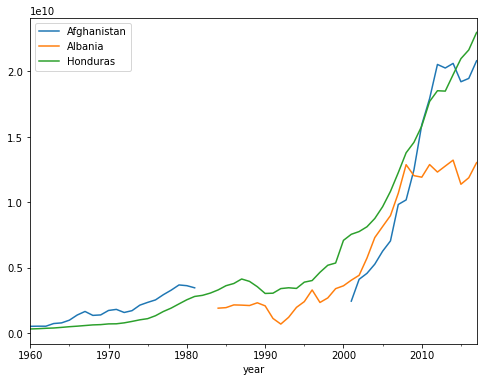

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

#convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')


Afghanistan and Albania are missing data, which show up as gaps in the results. 


 Exercise - Part 1

Your first task is to calculate mean GDP for each country and fill in missing values with the country mean. This is a bit tricky to do in pandas. Here are a few links that should be helpful:
* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.groupby.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html
* https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html

In [ ]:
# TODO: Use the df_melt dataframe and fill in missing values with a country's mean GDP
# If you aren't sure how to do this, 
# look up something like "how to group data and fill in nan values in pandas" in a search engine
# Put the results in a new column called 'GDP_filled'.

# HINT: You can do this with these methods: groupby(), transform(), a lambda function, fillna(), and mean()

df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))        # input missing values with mean

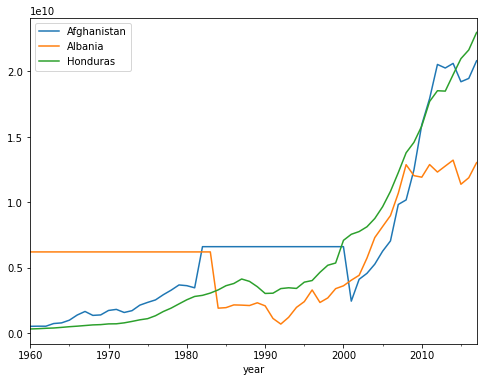

In [ ]:
# Plot the results
plot_results('GDP_filled')

This is somewhat of an improvement. At least there is no missing data; however, because GDP tends to increase over time, the mean GDP is probably not the best way to fill in missing values for this particular case. Next, try using forward fill to deal with any missing values.

Excercise - Part 2

Use the fillna forward fill method to fill in the missing data. Here is the [documentation](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html).

The pandas fillna method has a forward fill option. For example, if you wanted to use forward fill on the GDP dataset, you could execute `df_melt['GDP'].fillna(method='ffill')`. However, there are two issues with that code. 
1. You want to first make sure the data is sorted by year
2. You need to group the data by country name so that the forward fill stays within each country

Write code to first sort the df_melt dataframe by year, then group by 'Country Name', and finally use the forward fill method.

In [ ]:
# Use forward fill to fill in missing GDP values
# HINTS: use the sort_values(), groupby(), and fillna() methods

df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')

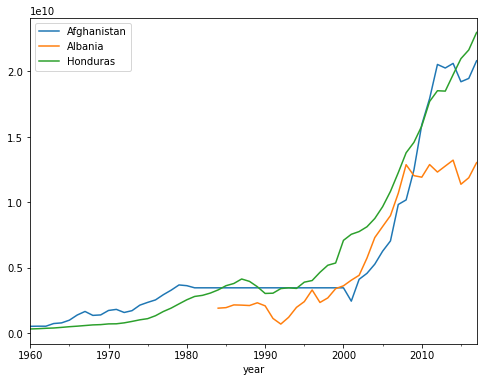

In [ ]:
# plot the results
plot_results('GDP_ffill')

This looks better at least for the Afghanistan data; however, the Albania data is still missing values. You can fill in the Albania data using back fill. That is what you'll do next.

Exercise - Part 3

This part is similar to Part 2, but now you will use backfill. Write code that backfills the missing GDP data.

In [ ]:
# Use back fill to fill in missing GDP values
# HINTS: use the sort_values(), groupby(), and fillna() methods

df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')

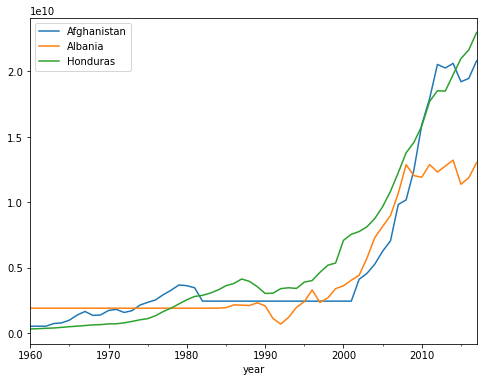

In [ ]:
plot_results('GDP_bfill')

In this case, the GDP data for all three countries is now complete. Note that forward fill did not fill all the Albania data because the first data entry in 1960 was NaN. Forward fill would try to fill the 1961 value with the NaN value from 1960.

To completely fill the entire GDP data for all countries, you might have to run both forward fill and back fill. Note as well that the results will be slightly different depending on if you run forward fill first or back fill first. Afghanistan, for example, is missing data in the middle of the data set. Hence forward fill and back fill will have slightly different results.

Run this next code cell to see if running both forward fill and back fill end up filling all the GDP NaN values.

In [ ]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

0

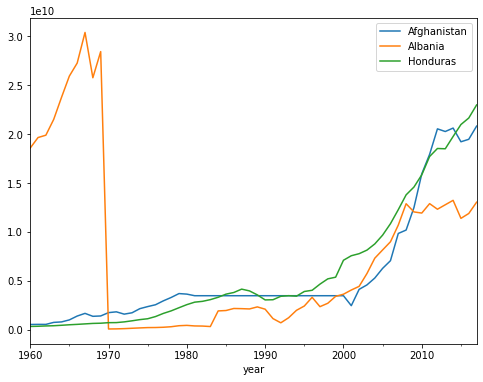

In [ ]:
plot_results('GDP_ff_bf')

> ## Duplicate Data

A data set might have duplicate data: in other words, the same record is represented multiple times. Sometimes, it's easy to find and eliminate duplicate data like when two records are exactly the same. At other times, like what was discussed in the video, duplicate data is hard to spot. 

From the World Bank GDP data, count the number of countries that have had a project totalamt greater than 1 billion dollars (1,000,000,000). To get the count, you'll have to remove duplicate data rows.

In [ ]:
projects = pd.read_csv('projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)

projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# filter the data frame for projects over 1 billion dollars

# count the number of unique countries in the results

projects[projects['totalamt'] > 1000000000]['countryname'].nunique()

17

> ## Dummy Variables

In this exercise, I'll create dummy variables from the projects data set. The idea is to transform categorical data like this:

| Project ID | Project Category |
|------------|------------------|
| 0          | Energy           |
| 1          | Transportation   |
| 2          | Health           |
| 3          | Employment       |

into new features that look like this:

| Project ID | Energy | Transportation | Health | Employment |
|------------|--------|----------------|--------|------------|
| 0          | 1      | 0              | 0      | 0          |
| 1          | 0      | 1              | 0      | 0          |
| 2          | 0      | 0              | 1      | 0          |
| 3          | 0      | 0              | 0      | 1          |


(Note if you were going to use this data with a model influenced by multicollinearity, you would want to eliminate one of the columns to avoid redundant information.) 

The reasoning behind these transformations is that machine learning algorithms read in numbers not text. Text needs to be converted into numbers. You could assign a number to each category like 1, 2, 3, and 4. But a categorical variable has no inherent order, so you want to reflect this in your features.

Pandas makes it very easy to create dummy variables with the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. In this exercise, you'll create dummy variables from the World Bank projects data; however, there's a caveat. The World Bank data is not particularly clean, so you'll need to explore and wrangle the data first.

You'll focus on the text values in the sector variables.


In [ ]:
projects = pd.read_csv('projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)

projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

Run the code cell below. This cell shows the percentage of each variable that is null. Notice the mjsector1 through mjsector5 variables are all null. The mjtheme1name through mjtheme5name are also all null as well as the theme variable. 

Because these variables contain so many null values, they're probably not very useful.

In [ ]:
# output percentage of values that are missing
(sector.isnull().sum() / sector.shape[0])  * 100         # 100 * ( مجموع النان فاليوز في كل الصفوف لكل عامود / عدد الصفوف لكل عامود)

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

In [ ]:
# output percentage of values that are missing
round( (sector.isnull().sum() / sector.shape[0])  * 100 , 2)         # 100 * ( مجموع النان فاليوز في كل الصفوف لكل عامود / عدد الصفوف لكل عامود)

project_name      0.00
lendinginstr      1.35
sector1           0.00
sector2          47.79
sector3          64.45
sector4          76.02
sector5          85.13
sector            3.50
mjsector1       100.00
mjsector2       100.00
mjsector3       100.00
mjsector4       100.00
mjsector5       100.00
mjsector          3.50
theme1            0.00
theme2           46.01
theme3           58.99
theme4           71.32
theme5           83.95
theme           100.00
goal             33.51
financier        61.31
mjtheme1name    100.00
mjtheme2name    100.00
mjtheme3name    100.00
mjtheme4name    100.00
mjtheme5name    100.00
dtype: float64

The sector1 variable looks promising; it doesn't contain any null values at all. In the next cell, store the unique sector1 values in a list and output the results. Use the sort_values() and unique() methods.

In [ ]:
# Create a list of the unique values in sector1. Use the sort_values() and unique() pandas methods. 
# And then convert those results into a Python list
uniquesectors1 = sector['sector1'].sort_values().unique()
uniquesectors1

array(['!$!0', '(Historic)Agency reform!$!50!$!AG',
       '(Historic)Agricultural credit!$!100!$!AC', ...,
       'Workforce Development and Vocational Education!$!96!$!EW',
       'Workforce Development and Vocational Education!$!98!$!EW',
       'Workforce Development and Vocational Education!$!99!$!EW'],
      dtype=object)

In [ ]:
# run this code cell to see the number of unique values
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 3060


There are a few issues with this 'sector1' variable. First, there are values labeled '!$!0'. These should be substituted with NaN.

Furthermore, each sector1 value ends with a ten or eleven character string like '!$!49!$!EP'. Some sectors show up twice in the list like:
 'Other Industry; Trade and Services!$!70!$!YZ',
 'Other Industry; Trade and Services!$!63!$!YZ',

But it seems like those are actually the same sector. You'll need to remove everything past the exclamation point. 

Many values in the sector1 variable start with the term '(Historic)'. Try removing that phrase as well.

### replace() method

With pandas, you can use the replace() method to search for text and replace parts of a string with another string. If you know the exact string you're looking for, the replace() method is straight forward. For example, say you wanted to remove the string '(Trial)' from this data:

| data                     |
|--------------------------|
| '(Trial) Banking'        |
| 'Banking'                |
| 'Farming'                |
| '(Trial) Transportation' |

You could use `df['data'].replace('(Trial'), '')` to replace (Trial) with an empty string.

### regular expressions
What about this data?

| data                                           |
|------------------------------------------------|
| 'Other Industry; Trade and Services?$ab' |
| 'Other Industry; Trade and Services?ceg' |

This type of data is trickier. In this case, there's a pattern where you want to remove a string that starts with an exclamation point and then has an unknown number of characters after it. When you need to match patterns of character, you can use [regular expressions](https://en.wikipedia.org/wiki/Regular_expression).

The replace method can take a regular expression. So
df['data'].replace('?.+', regex=True) where '?.+' means find a set of characters that starts with a question mark is then followed by one or more characters. You can see a [regular expression cheat sheet](https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285) here.


In [ ]:
# TODO: In the sector1 variable, replace the string '!$10' with nan
# HINT: you can use the pandas replace() method and numpy.nan
sector['sector1'] = sector['sector1'].replace('!$!0', np.nan)

# TODO: In the sector1 variable, remove the last 10 or 11 characters from the sector1 variable.
# HINT: There is more than one way to do this including the replace method
# HINT: You can use a regex expression '!.+'
# That regex expression looks for a string with an exclamation
# point followed by one or more characters

sector['sector1'] = sector['sector1'].replace('!.+', '', regex=True)

# TODO: Remove the string '(Historic)' from the sector1 variable
# HINT: You can use the replace method
sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:',  (sector['sector1'].isnull().sum() / sector['sector1'].shape[0]) * 100 )

Number of unique sectors after cleaning: 156
Percentage of null values after cleaning: 3.496273564226217


Now there are 156 unique categorical values. That's better than 3060. If you were going to use this data with a supervised learning machine model, you could try converting these 156 values to dummy variables. You'd still have to train and test a model to see if those are good features.

In this next exercise, use the pandas pd.get_dummies() method to create dummy variables. Then use the concat() method to concatenate the dummy variables to a dataframe that contains the project totalamt variable and the project year from the boardapprovaldate.

In [ ]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

#  Filter the projects data for the totalamt, the year from boardapprovaldate, and the dummy variables
projects['year'] = projects['boardapprovaldate'].dt.year
df = projects[['totalamt','year']]
df_final = pd.concat([df, dummies], axis=1)

df_final.head()

,totalamt,year,Adult; Basic and Continuing Education,Agency reform,Agricultural Extension; Research; and Other Support Activities,Agricultural credit,Agricultural extension,Agricultural markets; commercialization and agri-business,Agriculture adjustment,Agro-industry,Agro-industry and marketing,Animal production,Annual crops,Aviation,Banking Institutions,Basic health,Business environment,Capital Markets,Central Government (Central Agencies),Civil service reform,Compulsory pension and unemployment insurance,Crops,Decentralization,Distribution and transmission,Early Childhood Education,Economic management,Education adjustment,Electric power and other energy adjustment,Energy Transmission and Distribution,Energy efficiency in Heat and Power,Environment adjustment,Environmental institutions,Fertilizer and other chemicals,Financial adjustment,Financial sector development,Fisheries,Flood protection,Forestry,General finance sector,HIV/AIDS,Health,Health Facilities and Construction,Highways,Housing Construction,Housing construction,Housing finance,Hydro,ICT Infrastructure,ICT Services,Industrial adjustment,Industrial restructuring,Institutional Development,Insurance and Pension,Irrigation and Drainage,Law and Justice,Livestock,Macro/non-trade,Manufacturing,Media,Micro- and SME finance,Mining,Mining and other extractive,Natural resources management,Non-Renewable Energy Generation,Non-sector specific,Oil and Gas,Oil and gas adjustment,Oil and gas exploration and development,Oil and gas transportation,Other Agriculture; Fishing and Forestry,Other Education,Other Energy and Extractives,Other Industry; Trade and Services,Other Information and Communications Technologies,Other Non-bank Financial Institutions,Other Public Administration,Other Transportation,Other Water Supply; Sanitation and Waste Management,Other agriculture,Other education,Other environment,Other finance,Other fuels,Other industry,Other population; health and nutrition,Other power and energy conversion,Other public sector management,Other social protection,Other social services,Other transportation,Other urban development,Other water supply and sanitation,Pensions and social insurance,Perennial crops,Petrochemicals and fertilizers,Pollution control / waste management,Population; health and nutrition adjustment,Ports/Waterways,Postal services,Power,Pre-investment / portfolio development,Primary Education,Privatization,Public Administration - Agriculture; Fishing & Forestry,Public Administration - Education,Public Administration - Energy and Extractives,Public Administration - Financial Sector,Public Administration - Health,Public Administration - Industry; Trade and Services,Public Administration - Information and Communications Technologies,Public Administration - Social Protection,Public Administration - Transportation,Public Administration - Water; Sanitation and Waste Management,Public enterprise reform,Public financial management,Public sector management adjustment,Railways,Refining; storage and distribution,Renewable Energy Biomass,Renewable Energy Geothermal,Renewable Energy Hydro,Renewable Energy Solar,Renewable Energy Wind,Renewable energy,Research,Roads and highways,Rural and Inter-Urban Roads,Rural roads,Rural water supply and sanitation,Sanitation,Secondary Education,Sewerage,Small scale enterprise,Social Protection,Social protection adjustment,Sub-National Government,Targeted health,Telecommunications,Telecommunications and informatics,Tertiary Education,Thermal,Tourism,Trade,Trade policy reform,Transportation adjustment,Urban Transport,Urban development adjustment,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,0,2018.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

> ## Finding & Eliminating Outliers

In this, I'll practice looking for outliers. I'll look at the World Bank GDP and population data sets. First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

Run the code below to import the data sets and prepare the data for analysis. The code:
* reads in the data sets
* reshapes the datasets to a long format
* uses back fill and forward fill to fill in missing values
* merges the gdp and population data together
* shows the first 10 values in the data set

### First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

In [ ]:
# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


Explore the data set to identify outliers using the Tukey rule.

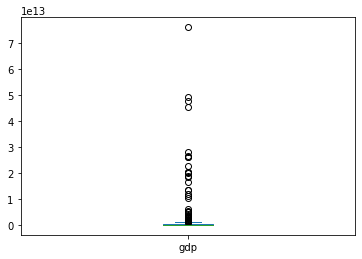

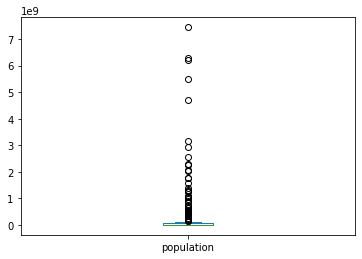

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Make a boxplot of the population data for the year 2016
df_2016.plot('population', kind='box');

# Make a boxplot of the gdp data for the year 2016
df_2016.plot('gdp', kind='box');

Eliminating outliers is a big topic. There are many different ways to eliminate outliers. A data engineer's job isn't necessarily to decide what counts as an outlier and what does not. A data scientist would determine that. The data engineer would code the algorithms that eliminate outliers from a data set based on any criteria that a data scientist has decided.

In this exercise, you'll write code to eliminate outliers based on the Tukey rule.

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [ ]:
population_2016 = df_2016[['Country Name','population']]

# Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


In [ ]:
# Filter the data for the year 2016 and put the results in the gdp_2016 variable. You only need
# to keep the Country Name and gdp columns
gdp_2016 = df_2016[['Country Name','gdp']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = gdp_2016['gdp'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
14789,Arab World,2.500164e+12
14795,Australia,1.208039e+12
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14818,Central Europe and the Baltics,1.313067e+12
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14843,East Asia & Pacific (excluding high income),1.350933e+13
14844,Early-demographic dividend,1.043743e+13
14845,East Asia & Pacific,2.251217e+13


Clearly many of these outliers are due to regional data getting aggregated together. 

Remove these data points and replot the analysis [boxplot]. There's a list provided below of the 'Country Name' values that are not actually countries.

In [ ]:
# remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries_population = population_outliers['Country Name'].tolist()
non_countries_gdp= gdp_outliers['Country Name'].tolist()

all_non_countries= set(non_countries_population + non_countries_gdp)

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(all_non_countries)]
df_2016

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
...,...,...,...,...
15043,Kosovo,2016,6.715487e+09,1816200.0
15044,"Yemen, Rep.",2016,1.821333e+10,27584213.0
15045,South Africa,2016,2.957627e+11,56015473.0
15046,Zambia,2016,2.095475e+10,16591390.0


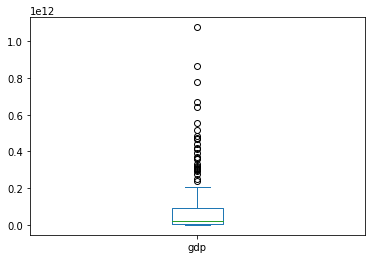

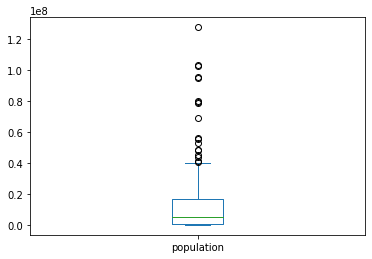

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Make a boxplot of the population data for the year 2016
df_2016.plot('population', kind='box');

# Make a boxplot of the gdp data for the year 2016
df_2016.plot('gdp', kind='box');

On the other hand, these countries have high GDP but are not population outliers.


2-Dimensional Analysis

Next, look at the data from a two-dimensional perspective.

The next code cell plots the GDP vs Population data including the country name of each point.

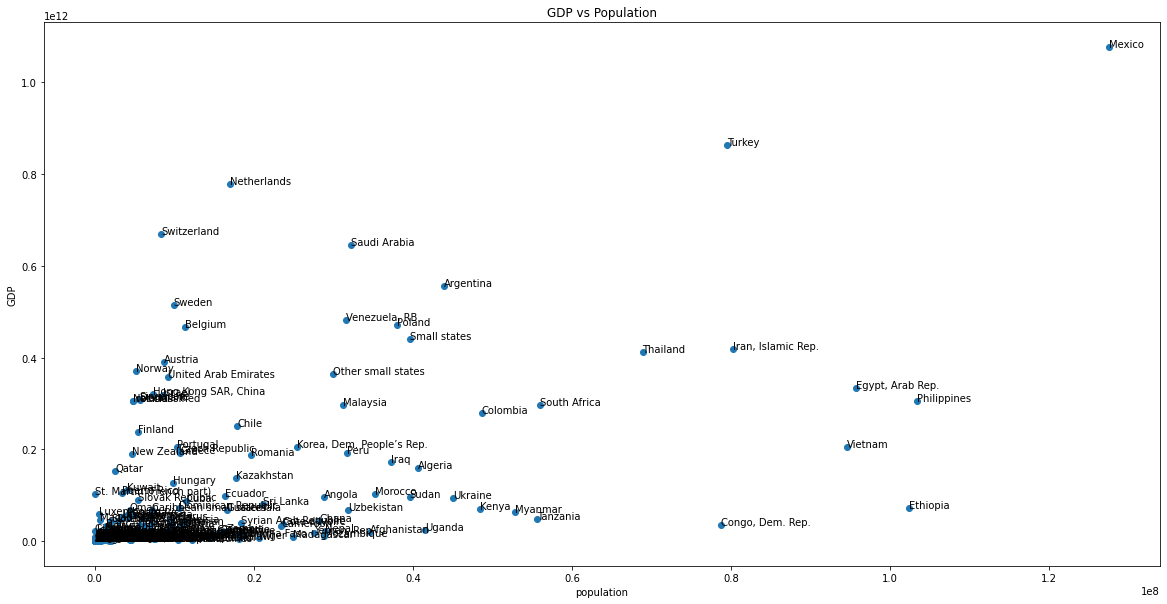

In [ ]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')

for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

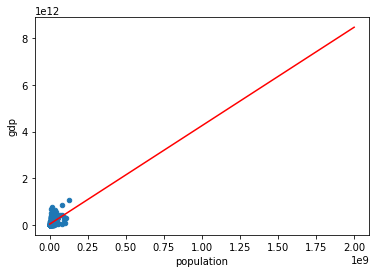

In [ ]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions, color= 'r')
plt.show()


Notice that the code now ouputs a GDP value of 5.26e+12 when population equals 1e9. In other words, removing the United States shifted the linear regression line down.

Data scientists sometimes have the task of creating an outlier removal model. In this exercise, you've used the Tukey rule. There are other one-dimensional models like eliminating data that is far from the mean. There are also more sophisticated models that take into account multi-dimensional data.

Next, write code to determine which countries are in the population_outliers array and in the gdp_outliers array. 

In [ ]:
# Find country names that are in both the population_outliers and the gdp_outliers 
# HINT: you can use the pandas intersection() method and python set() and list() methods

list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['European Union',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'IDA & IBRD total',
 'Middle East & North Africa',
 'High income',
 'Europe & Central Asia (excluding high income)',
 'Pre-demographic dividend',
 'Lower middle income',
 'East Asia & Pacific (IDA & IBRD countries)',
 'OECD members',
 'Early-demographic dividend',
 'China',
 'Low & middle income',
 'Russian Federation',
 'South Asia',
 'Arab World',
 'Sub-Saharan Africa (excluding high income)',
 'Brazil',
 'India',
 'United States',
 'Latin America & Caribbean (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Upper middle income',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Post-demographic dividend',
 'Europe & Central Asia',
 'East Asia & Pacific (excluding high income)',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'IDA total',
 'East Asia & Pacific',
 'Middle income',
 'Sub-Saharan Africa',
 'South Asia (IDA & IBRD)',
 'Latin America & Caribbean',
 'Late-demographi

These countries have both relatively high populations and high GDPs. That might be an indication that although these countries have high values for both gdp and population, they're not true outliers when looking at these values from a two-dimensional perspective.

Now write code to find countries in population_outliers but not in the gdp_outliers. 

In [ ]:
# Find country names that are in the population outliers list but not the gdp outliers list
# HINT: Python's set() and list() methods should be helpful

list(set(population_outliers['Country Name']) - set(gdp_outliers['Country Name']))

['Pakistan',
 'Indonesia',
 'Bangladesh',
 'Least developed countries: UN classification',
 'Nigeria',
 'Fragile and conflict affected situations',
 'IDA blend',
 'Heavily indebted poor countries (HIPC)',
 'IDA only',
 'Low income']

These countries are population outliers but not GDP outliers. If looking at outliers from a two-dimensional perspective, there's some indication that these countries might be outliers.

And finally, write code to find countries that are in the gdp_outliers array but not the population_outliers array.

In [ ]:
# Find country names that are in the gdp outliers list but not the population outliers list
# HINT: Python's set() and list() methods should be helpful

list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['United Kingdom',
 'Spain',
 'Australia',
 'Korea, Rep.',
 'Central Europe and the Baltics',
 'Canada',
 'Japan',
 'Germany',
 'France',
 'Italy']

Write a function that uses the Tukey rule to eliminate outliers from an array of data.

In [ ]:
# Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

# HINT: Re-use code from the previous exercise

def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR
    
    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

Now use the function to eliminate population outliers and then gdp outliers from the dataframe. Store results in the df_outlier_removed variable.

In [ ]:
# Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2016.copy()

for column in ['population','gdp']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

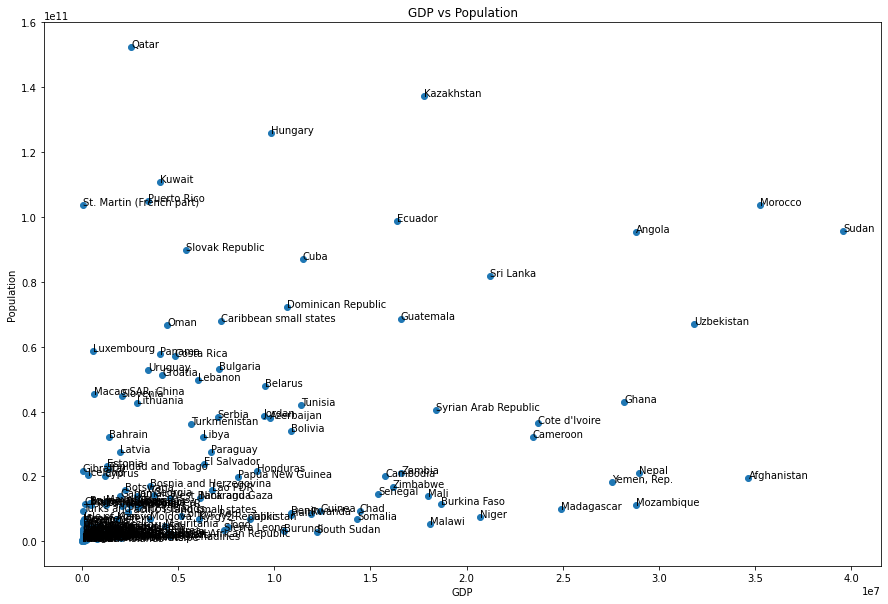

In [ ]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

>## Scaling Data

In this exercise, you'll practice scaling data. Sometimes, you'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.

In this exercise, you'll practice implementing standardization and normalization in code. There are libraries, like scikit-learn, that can do this for you; however, in data engineering, you might not always have these tools available.

Normalize the Data

To normalize data, you take a feature, like gdp, and use the following formula

$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$

where 
* x is a value of gdp
* x_max is the maximum gdp in the data
* x_min is the minimum GDP in the data

First, write a function that outputs the x_min and x_max values of an array. The inputs are an array of data (like the GDP data). The outputs are the x_min and x_max values

In [ ]:
def x_min_max(data):
    X_min = min(data)
    X_max = max(data)
    return X_min, X_max

x_min_max(df_2016['gdp'])

(36572611.8853148, 1076912039691.17)

In [ ]:
x_min_max(df_2016['population'])

(11097.0, 127540423.0)

Next, write a function that normalizes a data point. The inputs are an x value, a minimum value, and a maximum value. The output is the normalized data point

In [ ]:
def normalize(X, x_min, x_max):
    # Complete this function
    # The input is a single value 
    # The output is the normalized value
    return (X - x_min) / (x_max - x_min)

Why are you making these separate functions? Let's say you are training a machine learning model and using normalized GDP as a feature. As new data comes in, you'll want to make predictions using the new GDP data. You'll have to normalize this incoming data. To do that, you need to store the x_min and x_max from the training set. Hence the x_min_max() function gives you the minimum and maximum values, which you can then store in a variable.


A good way to keep track of the minimum and maximum values would be to use a class. In this next section, fill out the Normalizer() class code to make a class that normalizes a data set and stores min and max values.

In [ ]:
class Normalizer():
  # Complete the normalizer class
  # The normalizer class receives a dataframe as its only input for initialization
  # For example, the data frame might contain gdp and population data in two separate columns
  # Follow the TODOs in each section
    
    def __init__(self, dataframe):
        
      # complete the init function. 
      # Assume the dataframe has an unknown number of columns like [['gdp', 'population']] 
      # iterate through each column calculating the min and max for each column
      # append the results to the params attribute list
      
      # For example, take the gdp column and calculate the minimum and maximum
      # Put these results in a list [minimum, maximum]
      # Append the list to the params variable
      # Then take the population column and do the same
      
      # HINT: You can put your x_min_max() function as part of this class and use it
      
      self.params = []

      for column in dataframe.columns:
        self.params.append(x_min_max(dataframe[column]))
            
    def x_min_max(data):
      # complete the x_min_max method
      # HINT: You can use the same function defined earlier in the exercise
      X_min = min(data)
      X_max = max(data)
      return X_min, X_max

    def normalize_data(self, x):
      # complete the normalize_data method
      # The function receives a data point as an input and then outputs the normalized version
      # For example, if an input data point of [gdp, population] were used. Then the output would
      # be the normalized version of the [gdp, population] data point
      # Put the results in the normalized variable defined below
      
      # Assume that the columns in the dataframe used to initialize an object are in the same
      # order as this data point x
      
      # HINT: You cannot use the normalize_data function defined earlier in the exercise.
      # You'll need to iterate through the individual values in the x variable        
      # Use the params attribute where the min and max values are stored 
      normalized = []
      for i, value in enumerate(x):
        x_min = self.params[i][0]
        x_max = self.params[i][1]
        normalized.append((x[i] - x_min) / (x_max - x_min))
      return normalized

In [ ]:
gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])

In [ ]:
gdp_normalizer.params

[(36572611.8853148, 1076912039691.17), (11097.0, 127540423.0)]

In [ ]:
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])         # i will pass to the function a new data [x0, x1] to normalize them

[12.466101083905317, 10.193646777369466]

In [ ]:
# for first 5 rows from [gdp & population]

for i in range(0, 5):
  x= df_2016[['gdp', 'population']].iloc[i:i+1, :]
  # print(x)
  print( gdp_normalizer.normalize_data([x['gdp'], x['population']]) )
  print('+++++')


[14784    0.002366
Name: gdp, dtype: float64, 14784    0.000735
Name: population, dtype: float64]
+++++
[14785    0.018045
Name: gdp, dtype: float64, 14785    0.271662
Name: population, dtype: float64]
+++++
[14786    0.088497
Name: gdp, dtype: float64, 14786    0.225849
Name: population, dtype: float64]
+++++
[14787    0.011001
Name: gdp, dtype: float64, 14787    0.022465
Name: population, dtype: float64]
+++++
[14788    0.002638
Name: gdp, dtype: float64, 14788    0.000519
Name: population, dtype: float64]
+++++



When normalizing or standardizing features for machine learning, you'll need to store the parameters you used to do the scaling. That way you can scale new data points when making predictions. In this exercise, you stored the minimum and maximum values of a feature. When standardizing data, you would need to store the mean and standard deviation. The standardization formula is:

$x_{standardized} = \frac{x - \overline{x}}{S}$

>## Feature Engineering

Practice creating new features from the GDP and population data. 

You'll create a new feature gdppercapita, which is GDP divided by population. You'll then write code to create new features like GDP squared and GDP cubed. 

Start by running the code below. It reads in the World Bank data, filters the data for the year 2016, and cleans the data.

Create a new feature called gdppercapita in a new column. This feature should be the gdp value divided by the population.

In [ ]:
# create a new feature called gdppercapita, 
#      which is the gdp value divided by the population value for each country

df_2016['gdppercapita'] = df_2016['gdp'] / df_2016['population']
df_2016['gdppercapita'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


14784    24655.737223
14785      561.778746
14786     3308.772828
14787     4131.872341
14788    37231.815671
Name: gdppercapita, dtype: float64

# **Create Pipelines**
# Load 

In this part, I'll create the data pipelines then load data into different formats: a csv file, a json file, and a SQLite database.

# <center> Working with Data comes from **World Bank Indicator Data** Source </center>

### **1)** Create a **Pipeline To Extract Data** 

I noticed that the majority of datasets coming from the World Bank Project Data source have a problem, which is that the initial rows are not regular, so the data frame is unable to know the number of real columns of file.

Therefore, I was able to do a Python trick to find out which rows are causing the error, and then exclude them and read the file properly.

In [9]:
def Extract_indicator_file(filename):
  try:
    df= pd.read_csv( str(filename) )
  except Exception as error_message:
    if 'Error tokenizing data' in str(error_message):
      import re
      lengths= []
      f = open(filename)
      for i in range(20):
          line = f.readline()
          line= re.split(r',(?=(?:[^"]*"[^"]*")*[^"]*$)', line)         # this regular expression to split the CSV file from ==> [,]
          lengths.append(len(line))
      f.close()

      from statistics import mode
      most_frequent_length= mode(lengths)         # Here I return the most frequence length, which will be the real number of columns in dataset
      most_freq_len_index = lengths.index(most_frequent_length)        # the index of most_frequent_length will be the value of [arguement ==> skiprows]

      df= pd.read_csv( str(filename), skiprows= most_freq_len_index )  

  return df


try:
  gdp= Extract_indicator_file('gdp_data.csv') 
  population= Extract_indicator_file('population_data.csv')
  rural_population= Extract_indicator_file('rural_population_percent.csv')
  electricity_access= Extract_indicator_file('electricity_access_percent.csv')
  AGRI_land= Extract_indicator_file('AGRI_land.csv')
except:
  pass

In [10]:
population.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN


### **2)** Create a **Pipeline To Clean Data** 

In [11]:
def remove_unnamed_cols(df):
  for c in df.columns:
    if 'Unnamed:' in c: 
      df.drop([c], axis= 1, inplace= True)

  return df


def Cleaning_Data(DataFrame):
  DataFrame= remove_unnamed_cols(DataFrame)

  return DataFrame



try:
  gdp = Cleaning_Data(gdp)
  population = Cleaning_Data(population)
  rural_population = Cleaning_Data(rural_population)
  electricity_access = Cleaning_Data(electricity_access)
  AGRI_land = Cleaning_Data(AGRI_land)
except:
  pass

In [12]:
# # Calculate the null values percentage per column:

# def null_percentage(df):
#   return round( (df.isnull().sum() / df.shape[0])  * 100 , 2)

# null_percentage(gdp)     # as shown from columns [1960 : 1989] are 100% null values so we must [delete this column {or} fill it with zero's]
#                          # and [2017]

### **3)** Create a **Pipeline To Transform/Melt Data** 

In [13]:
def not_years_columns(df):
  not_years_cols= []
  for c in df.columns:
    try:
      int(c)
    except:
      not_years_cols.append(c)

  return not_years_cols


def Melt_DataFrame(df, MeltedColumnValueName):
  # Reshape the data sets so that they are in long format
  excluded_cols = not_years_columns(df)                 # These columns which not shared with the melt process
  melted_df= df.melt(id_vars= excluded_cols, 
                    var_name='year', 
                    value_name=MeltedColumnValueName)

  return melted_df



try:
  gdp= Melt_DataFrame(gdp, 'GDP')
  population = Melt_DataFrame(population, 'Population')
  rural_population = Melt_DataFrame(rural_population, 'Rural Population')
  electricity_access = Melt_DataFrame(electricity_access, 'Electricity Access')
  AGRI_land = Melt_DataFrame(AGRI_land, 'Agricultural Land')
except:
  pass

### **4)** Create a **Pipeline To Combine variety Data From World Bank Indicator Data source** 

In [14]:
# Here I Request from user to Enter all data frames that have been extracted from the previous pipeline directly which is 'Melt_DataFrame' Pipeline:
# [gdp, population, rural_population, electricity_access, AGRI_land]
def request_all_df():
  all_dataframes= input('Please Enter A List With All The DataFrames Returned From The Function Called "Melt_DataFrame": \n').strip()
  if type(all_dataframes) == str and all_dataframes[0] == '[' and all_dataframes[-1] == ']':
    all_dataframes= all_dataframes[1:-1].strip()
    all_dataframes= all_dataframes.split(' ')
    all_dataframes= [i.strip().strip(',') for i in all_dataframes]

  else:
    all_dataframes= all_dataframes.split(' ')
    all_dataframes= [i.strip().strip(',') for i in all_dataframes]

  all_dataframes= [i.strip('"').strip("'") for i in all_dataframes]
  all_dataframes= [i for i in all_dataframes if len(i) > 0]
  print('')

  return all_dataframes


# Here will exclude the different columns and keep the similar columns:
def drop_IndicatorName_IndicatorCode_cols():
  DFs_List= request_all_df()
  all_dataframes= []
  for DF in DFs_List:
    eval(DF).drop(['Indicator Name', 'Indicator Code'], axis= 1, inplace= True)
    all_dataframes.append(DF)

  return all_dataframes


def combine_melted_data():
  dic= {}
  indicator_dfs= drop_IndicatorName_IndicatorCode_cols()

  for df_name in indicator_dfs:
    dic['{}_melt'.format(df_name)]= eval(df_name)

  dict_to_list= list(dic.values())
  df_indicator= dict_to_list[0]
  i= 1
  while i < len(dict_to_list):
    try:
      marge_on= tuple(not_years_columns(dict_to_list[i])[:-1])
      marged_df= dict_to_list[i].merge(dict_to_list[i+1], on= marge_on)
      df_indicator= df_indicator.merge(marged_df, on= marge_on)
      i += 2
    except:
      pass 

  return df_indicator



def Combine_Indicator_Data():
  try:
    df_indicator = combine_melted_data()
  except:
    pass
    
  return df_indicator

df_indicator= Combine_Indicator_Data()
df_indicator.head()

Please Enter A List With All The DataFrames Returned From The Function Called "Melt_DataFrame": 
[gdp, population, rural_population, electricity_access, AGRI_land]



,Country Name,Country Code,year,GDP,Population,Rural Population,Electricity Access,Agricultural Land
0,Aruba,ABW,1960,NaN,54211.0,49.224,NaN,NaN
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0,91.779,NaN,NaN
2,Angola,AGO,1960,NaN,5643182.0,89.565,NaN,NaN
3,Albania,ALB,1960,NaN,1608800.0,69.295,NaN,NaN
4,Andorra,AND,1960,NaN,13411.0,41.550,NaN,NaN


### **5)** Create a **Pipeline To Handle Missing Data** 

In [15]:
def Handle_Missing_Data(df):
  for c in df.columns:
    df[c]= df.sort_values('year')[c].fillna(method='ffill').fillna(method='bfill')

  return df


try:
  df_indicator= Handle_Missing_Data(df_indicator)
except:
  pass
  
df_indicator.head()

,Country Name,Country Code,year,GDP,Population,Rural Population,Electricity Access,Agricultural Land
0,Aruba,ABW,1960,1.916242e+09,54211.0,49.224,0.01,15.0
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0,91.779,0.01,15.0
2,Angola,AGO,1960,1.121556e+08,5643182.0,89.565,0.01,15.0
3,Albania,ALB,1960,1.121556e+08,1608800.0,69.295,0.01,15.0
4,Andorra,AND,1960,1.121556e+08,13411.0,41.550,0.01,15.0


### **6)** Create a **Pipeline To Exclude Outliers** 

In [16]:
# Detecting outliers using the Inter Quantile Range(IQR)
def outliers_detection(df, unique_col):
  numerical_columns= df.select_dtypes(include=['number']).columns             # select only numerical [int & float] variables from [df] dataframe
  all_non_countries= []

  for col in numerical_columns:
    # Calculate the first quartile 
    Q1 = df[col].quantile(0.25)

    # Calculate the third quartile
    Q3 = df[col].quantile(0.75)

    # Calculate the interquartile range Q3 - Q1
    IQR = Q3 - Q1

    # Calculate the maximum value and minimum values according to the Tukey rule
    # max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    dataframe_outliers= df[(df[col] > max_value) | (df[col] < min_value)]          # These are the all outliers.

    # filter out values that are not countries
    non_countries_list = dataframe_outliers[unique_col].tolist()
    all_non_countries.extend(non_countries_list)

  all_non_countries= set(all_non_countries)
  outliers_df = df[df[unique_col].isin(all_non_countries)]
  outliers_df.reset_index(drop=True, inplace=True)
    
  return outliers_df


def remove_outliers(outliers_df, df):
  df= df.merge(outliers_df, how='outer', indicator=True).query('_merge == "left_only"').drop(['_merge'], axis= 1)
  df.reset_index(drop=True, inplace=True)

  # rename the [Country Name, Country Code] to [countryname,	countrycode] to match with the project data
  df=df.rename(columns = {'Country Name': 'countryname', 'Country Code': 'countrycode'})    

  return df



def Outliers_Detection_Exclusion(df_indicator):
  try:
    Outliers_DF= outliers_detection(df_indicator, 'Country Code')
    df_indicator= remove_outliers(Outliers_DF, df_indicator)
  except:
    pass

  return df_indicator



df_indicator= Outliers_Detection_Exclusion(df_indicator)
print(df_indicator.shape)
df_indicator.head(3)

(7598, 8)


,countryname,countrycode,year,GDP,Population,Rural Population,Electricity Access,Agricultural Land
0,Aruba,ABW,1960,1.916242e+09,54211.0,49.224,0.01,15.0
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0,91.779,0.01,15.0
2,Angola,AGO,1960,1.121556e+08,5643182.0,89.565,0.01,15.0


# <center> Working with Data comes from **World Bank Project Data** Source </center>

### **1)** Create a **Pipeline To Clean Data** 

In [17]:
def extract_project_dataset():
  import sys
  if not sys.warnoptions:
    df= pd.read_csv('projects_data.csv')
  else:
    df= pd.read_csv('projects_data.csv', dtype=str)

  return df


def handle_id(df):
  df['id']= df['id'].apply(lambda x: x[1:])
  return df


def handle_countryname(df):
  df['countryname']= df['countryname'].str.split(';').str.get(0)
  return df


def handle_lendinginstr(df):
  df['lendinginstr']= df['lendinginstr'].str.replace('-', ' ')
  df['lendinginstr']= df['lendinginstr'].replace('UNIDENTIFIED', np.nan)
  return df


def handle_project_name(df):
  df['project_name']= df['project_name'].str.replace('-', ' ')
  return df


def handle_lendprojectcost(df):
  df['lendprojectcost'] = df['lendprojectcost'].str.replace(',','')
  return df


def handle_ibrdcommamt(df):
  df['ibrdcommamt'] = df['ibrdcommamt'].str.replace(',', '')
  return df


def handle_idacommamt(df):
  df['idacommamt'] = df['idacommamt'].str.replace(',', '')
  return df


def handle_totalamt(df):
  df['totalamt'] = df['totalamt'].str.replace(',', '')
  return df


def handle_grantamt(df):
  df['grantamt'] = df['grantamt'].str.replace(',', '')
  return df


def handle_5_sectors(df):
  for i in range(1, 6):
    df['sector{}'.format(i)] = df['sector{}'.format(i)].replace('!$!0', np.nan)
    df['sector{}'.format(i)] = df['sector{}'.format(i)].replace('!.+', '', regex=True)
    df['sector{}'.format(i)] = df['sector{}'.format(i)].replace('^(\(Historic\))', '', regex=True)
  return df


def handle_5_themes(df):
  for i in range(1, 6):
    df['theme{}'.format(i)] = df['theme{}'.format(i)].replace('!$!0', np.nan)
    df['theme{}'.format(i)] = df['theme{}'.format(i)].replace('!.+', '', regex=True)
    df['theme{}'.format(i)] = df['theme{}'.format(i)].replace('^(\(Historic\))', '', regex=True)
  return df


def handle_financier(df):
  df['financier']= df['financier'].str.split(';').str.get(0)
  return df


def handle_GeoLocID(df):
  df['GeoLocID']= df['GeoLocID'].str.replace(';', ' ')
  df['GeoLocID']= df['GeoLocID'].str.replace(';', '; ')
  return df


def handle_latitude_longitude(df):
  for col in ['Latitude', 'Longitude']:
    df[col]= df[col].apply(lambda x: x.split(';') if type(x) != float else np.nan)
    df[col]= df[col].apply(lambda x: [str(float(i)) for i in x] if type(x) != float else np.nan)
    df[col]= df[col].apply(lambda x: ';'.join(x) if type(x) != float else np.nan)

  return df


def drop_not_important_cols(df):
  df.drop(['sector', 'mjsector', 'goal', 'location', 'Country', 'Unnamed: 56'], axis= 1, inplace= True)
  return df


def Data_Cleaning():
  try:
      df_projects = extract_project_dataset()
      df_projects = handle_id(df_projects)
      df_projects = handle_countryname(df_projects)
      df_projects = handle_lendinginstr(df_projects)
      df_projects = handle_project_name(df_projects)
      df_projects = handle_lendprojectcost(df_projects)
      df_projects = handle_ibrdcommamt(df_projects)
      df_projects = handle_idacommamt(df_projects)
      df_projects = handle_totalamt(df_projects)
      df_projects = handle_grantamt(df_projects)
      df_projects = handle_5_sectors(df_projects)
      df_projects = handle_5_themes(df_projects)
      df_projects = handle_financier(df_projects)
      df_projects = handle_GeoLocID(df_projects)
      df_projects = handle_latitude_longitude(df_projects)
      df_projects = drop_not_important_cols(df_projects)
  except:
    pass

  return df_projects


df_projects= Data_Cleaning()
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,financier,mjtheme1name,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,GeoLocID,GeoLocName,Latitude,Longitude
0,162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,0002327546 0002328925 0002565340 0002565343 00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7.0;10.0;5.41667;6.5;11.5;8.0,3.58333;6.0;7.5;6.0;4.0;10.5


### **2)** Create a **Pipeline To Handle Data Types** 

In [18]:
def id_to_numerical(df):
  df['id'] = pd.to_numeric( df['id'] )
  return df

def lendprojectcost_to_numerical(df):
  df['lendprojectcost'] = pd.to_numeric( df['lendprojectcost'].str.replace(',', "") )
  return df

def ibrdcommamt_to_numerical(df):
  df['ibrdcommamt'] = pd.to_numeric(df['ibrdcommamt'].str.replace(',', ""))
  return df

def idacommamt_to_numerical(df):
  df['idacommamt'] = pd.to_numeric(df['idacommamt'].str.replace(',', ""))
  return df

def totalamt_to_numerical(df):
  df['totalamt'] = pd.to_numeric(df['totalamt'].str.replace(',', ""))
  return df

def grantamt_to_numerical(df):
  df['grantamt'] = pd.to_numeric(df['grantamt'].str.replace(',', ""))
  return df

###  parsing dates
def closingdate_to_datetime(df):
  df['closingdate'] = pd.to_datetime(df['closingdate'])
  return df

def boardapprovaldate_to_datetime(df):
  df['boardapprovaldate'] = pd.to_datetime(df['boardapprovaldate'])
  return df


def Handle_Data_Types(df_projects):
  try:
    df_projects= id_to_numerical(df_projects)
    df_projects= lendprojectcost_to_numerical(df_projects)
    df_projects= ibrdcommamt_to_numerical(df_projects)
    df_projects= idacommamt_to_numerical(df_projects)
    df_projects= totalamt_to_numerical(df_projects)
    df_projects= grantamt_to_numerical(df_projects)
    df_projects= closingdate_to_datetime(df_projects)
    df_projects= boardapprovaldate_to_datetime(df_projects)
  except:
    pass

  return df_projects


df_projects= Handle_Data_Types(df_projects)
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,financier,mjtheme1name,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,GeoLocID,GeoLocName,Latitude,Longitude
0,162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,0002327546 0002328925 0002565340 0002565343 00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7.0;10.0;5.41667;6.5;11.5;8.0,3.58333;6.0;7.5;6.0;4.0;10.5


### **3)** Create a **Pipeline To Handle Missing Data** 

____
#### **Theoretically,** 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.

#### **Practically,** this varies. Many times we get variables with ~50% of missing values but still, the customer insists to have it for analyzing. In those cases, we might want to treat them accordingly.

#### **From many projects' expertise So,** this varied from case to case and the amount of information you think the variable has. if we have columns with 50% null values we must decide if the rest of 50% of the data has very high information. In such cases, you would still use the variable.
____

In [19]:
## this function removes variables that have missing values [greater than 30% of the variable values]
def detect_and_remove_null_cols(df):
  percentage_30= (df.shape[0] * 30) // 100         # get the 30% percentage of dataset records 
  indexes= df.isnull().sum().index.tolist()
  values= df.isnull().sum().values.tolist()

  cols_nulls_lte_30= []
  for indx, val in zip(indexes, values):
    if val <= percentage_30:
      cols_nulls_lte_30.append(indx)

  df= df[cols_nulls_lte_30]
  return df


# In categorical columns we impute missing values with the most frequent value
def imput_categorical_cols(df):
  DF = df.select_dtypes(include=['object'])                          # select only categorical variables from [df] dataframe
  cols_have_nan= DF.loc[:, DF.isnull().any(axis = 0)].columns        # get only columns that have any null values

  for c in cols_have_nan:
    most_freq_value= DF[c].value_counts().sort_values(ascending= False).index[0]      # return the most frequent value 
    DF[c].fillna(most_freq_value, inplace= True)                                      # imput null values with most frequent value

  df[DF.columns]= DF

  return df


# In numerical [int & float] columns we impute missing values with the [mean or median] value
def imput_numerical_cols(df):
  DF = df.select_dtypes(include=['int', 'float'])                    # select only numerical [int & float] variables from [df] dataframe
  cols_have_nan= DF.loc[:, DF.isnull().any(axis = 0)].columns        # get only columns that have any null values

  for c in cols_have_nan: 
    DF[c].fillna(DF[c].mean(), inplace= True)                        # imput null values with mean value

  df[DF.columns]= DF

  return df


# In datetime columns we prefer to impute missing values with the [forward & backward] value
def input_datetime_cols(df):
  DF = df.select_dtypes(include= ['datetimetz'])                     # select only datetimetz variables from [df] dataframe
  cols_have_nan= DF.loc[:, DF.isnull().any(axis = 0)].columns        # get only columns that have any null values

  for c in cols_have_nan:                  
    DF[c]= DF[c].fillna(method='ffill').fillna(method='bfill')       # imput null values with forward & backward value

  df[DF.columns]= DF

  return df


def Handle_missing_values(df_projects):
  try:
    df_projects= detect_and_remove_null_cols(df_projects)
    df_projects= imput_categorical_cols(df_projects)
    df_projects= imput_numerical_cols(df_projects)
    df_projects= input_datetime_cols(df_projects)
  except:
    pass

  return df_projects


df_projects= Handle_missing_values(df_projects)
df_projects.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-19-9e0d31641776>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1
0,162228,Other,World,RE,Investment Project Financing,IN,N,L,Active,Active,...,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,500000.0,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en,Central Government (Central Agencies)
1,163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,N,L,Active,Active,...,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en,Central Government (Central Agencies)
2,167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,Y,L,Active,Active,...,2018-06-28 00:00:00+00:00,June,2023-12-31 00:00:00+00:00,50000000.0,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en,Central Government (Central Agencies)


In [20]:
# # Check:
# df_projects.isnull().sum()

### **4)** Create a **Pipeline To Encode Variables** 

In [21]:
def supplementprojectflg_Label_Encoding(df):
  mapper= {'Y': 1, 'N': 0}
  df['supplementprojectflg']= df['supplementprojectflg'].apply(lambda x: mapper[x])
  return df

def board_approval_month__Label_Encoding(df):
  mapper= {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,
           'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
  df['board_approval_month']= df['board_approval_month'].apply(lambda x: mapper[x])
  return df


def Label_Encoding(df_projects):
  try:
    df_projects = supplementprojectflg_Label_Encoding(df_projects)
    df_projects = board_approval_month__Label_Encoding(df_projects)
  except:
    pass

  return df_projects


df_projects= Label_Encoding(df_projects)
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,status,...,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1
0,162228,Other,World,RE,Investment Project Financing,IN,0,L,Active,Active,...,2018-06-28 00:00:00+00:00,6,2023-12-31 00:00:00+00:00,500000.0,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en,Central Government (Central Agencies)
1,163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,0,L,Active,Active,...,2018-06-28 00:00:00+00:00,6,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en,Central Government (Central Agencies)
2,167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,1,L,Active,Active,...,2018-06-28 00:00:00+00:00,6,2023-12-31 00:00:00+00:00,50000000.0,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en,Central Government (Central Agencies)
3,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,0,L,Active,Active,...,2018-06-27 00:00:00+00:00,6,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en,Central Government (Central Agencies)
4,161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,0,L,Active,Active,...,2018-06-27 00:00:00+00:00,6,2023-05-31 00:00:00+00:00,100000000.0,0,100000000,100000000,0,http://projects.worldbank.org/P161364?lang=en,Social Protection


### **5)** Create a **Pipeline To remove Duplicate Data** 

In [22]:
def drop_duplicated_cols(df):
  df= df.loc[:,~df.apply(lambda x: x.duplicated(), axis=1).all()].copy()          # remove column that have the same values of another column values
  return df

def drop_duplicated_rows(df):
  df.drop_duplicates(inplace= True)
  return df


def Drop_Duplicates(df_projects):
  try:
    df_projects = drop_duplicated_cols(df_projects)
    df_projects = drop_duplicated_rows(df_projects)
  except:
    pass

  return df_projects


df_projects= Drop_Duplicates(df_projects)
df_projects.head(3)

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1
0,162228,Other,World,RE,Investment Project Financing,IN,0,L,Active,Creating a Trade in Value Added Database for ...,2018-06-28 00:00:00+00:00,6,2023-12-31 00:00:00+00:00,500000.0,0,0,0,500000,http://projects.worldbank.org/P162228?lang=en,Central Government (Central Agencies)
1,163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,0,L,Active,Productive Inclusion Project,2018-06-28 00:00:00+00:00,6,2023-12-31 00:00:00+00:00,200000000.0,0,200000000,200000000,0,http://projects.worldbank.org/P163962?lang=en,Central Government (Central Agencies)
2,167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,1,L,Active,Additional Financing for Health Sector Support...,2018-06-28 00:00:00+00:00,6,2023-12-31 00:00:00+00:00,50000000.0,0,58330000,58330000,0,http://projects.worldbank.org/P167672?lang=en,Central Government (Central Agencies)


In [23]:
df_projects.shape

(18248, 20)

### **6)** Create a **Pipeline To Exclude Outliers** 

In [24]:
# Detecting outliers using the Inter Quantile Range(IQR)
def Detect_outliers(df, unique_col):
  numerical_columns= df.select_dtypes(include=['number']).columns             # select only numerical [int & float] variables from [df] dataframe
  all_non_countries= []

  for col in numerical_columns:
    # Calculate the first quartile 
    Q1 = df[col].quantile(0.25)

    # Calculate the third quartile
    Q3 = df[col].quantile(0.75)

    # Calculate the interquartile range Q3 - Q1
    IQR = Q3 - Q1

    # Calculate the maximum value and minimum values according to the Tukey rule
    # max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    dataframe_outliers= df[(df[col] > max_value) | (df[col] < min_value)]          # These are the all outliers.

    # filter out values that are not countries
    non_countries_list = dataframe_outliers[unique_col].tolist()
    all_non_countries.extend(non_countries_list)

  all_non_countries= set(all_non_countries)
  outliers_df = df[df[unique_col].isin(all_non_countries)]
  outliers_df.reset_index(drop=True, inplace=True)
    
  return outliers_df


def Remove_outliers(outliers_df, df, unique_col):
  df= df.merge(outliers_df, how='outer', indicator=True).query('_merge == "left_only"').drop(['_merge'], axis= 1)
  df.reset_index(drop=True, inplace=True)

  return df



def Detect_Exclude_Outliers(df_projects):
  try:
    Outliers_DF= Detect_outliers(df_projects, 'id')
    df_projects= Remove_outliers(Outliers_DF, df_projects, 'id')
  except:
    pass

  return df_projects



df_projects= Detect_Exclude_Outliers(df_projects)
print(df_projects.shape)
df_projects.head(3)

(8799, 20)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,supplementprojectflg,productlinetype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,url,sector1
0,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,0,L,Active,Public Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,6,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,0,http://projects.worldbank.org/P158768?lang=en,Central Government (Central Agencies)
1,164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,0,L,Active,Grenada First Fiscal Resilience and Blue Growt...,2018-06-22 00:00:00+00:00,6,2019-12-31 00:00:00+00:00,35000000.0,0,30000000,30000000,0,http://projects.worldbank.org/P164289?lang=en,Other Public Administration
2,165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,0,L,Active,First Programmatic Financial and Fiscal Stabil...,2018-06-22 00:00:00+00:00,6,2019-06-30 00:00:00+00:00,25000000.0,0,35000000,35000000,0,http://projects.worldbank.org/P165425?lang=en,Central Government (Central Agencies)


### **7)** Create a **Pipeline To Exclude Irrelevant Variables** 

In [25]:
def Exclude_Irrelevant_Cols(df):
  relevent_cols= []
  for c in df.columns:
    if len(df[c].unique()) >= 2:
      relevent_cols.append(c)

  df= df[relevent_cols]

  return df


try:
  df_projects= Exclude_Irrelevant_Cols(df_projects)
except:
    pass
    
print(df_projects.shape)
df_projects.head(3)

(8799, 17)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,url,sector1
0,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,Active,Public Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,6,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,http://projects.worldbank.org/P158768?lang=en,Central Government (Central Agencies)
1,164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,Active,Grenada First Fiscal Resilience and Blue Growt...,2018-06-22 00:00:00+00:00,6,2019-12-31 00:00:00+00:00,35000000.0,0,30000000,30000000,http://projects.worldbank.org/P164289?lang=en,Other Public Administration
2,165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,Active,First Programmatic Financial and Fiscal Stabil...,2018-06-22 00:00:00+00:00,6,2019-06-30 00:00:00+00:00,25000000.0,0,35000000,35000000,http://projects.worldbank.org/P165425?lang=en,Central Government (Central Agencies)


### **8)** Create a **Pipeline To Engineer Features** 

In [26]:
# [Feature_Engineering PipeLine]:

def year_from_boardapprovaldate(df):
  df['year'] = df['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4)
  # df['year'] = pd.to_numeric( df['year'] )
  return df


def locations_from_latitude_and_longitude(DF):

  def f(X_col1, X_col2):

    la= X_col1.split(';')
    lo= X_col2.split(';')

    from geopy.geocoders import Nominatim
    from geopy.exc import GeocoderTimedOut

    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="geoapiExercises")
    Locations= []

    for lat, lon in zip(la, lo):
      try:
        location = geolocator.geocode(str(lat)+ ","+ str(lon))
        Locations.append(location[0] + "; ")
      except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s"%(str(lat)+ ","+ str(lon)))

    Locations_join= ' '.join(Locations)
    return Locations_join

  DF['Locations'] = DF.apply(lambda x: f(x.Latitude, x.Longitude) if type(x.Latitude) != float else np.nan, axis=1)
  DF.drop(['Latitude', 'Longitude'], axis= 1, inplace= True)

  return DF




def Feature_Engineering(df_projects):
  try:
    df_projects = year_from_boardapprovaldate(df_projects)
    df_projects = locations_from_latitude_and_longitude(df_projects)
  except:
    pass

  return df_projects

df_projects= Feature_Engineering(df_projects)
print(df_projects.shape)
df_projects.head(3)

(8799, 18)


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,url,sector1,year
0,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,Active,Public Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,6,2023-06-28 00:00:00+00:00,50000000.0,0,20000000,20000000,http://projects.worldbank.org/P158768?lang=en,Central Government (Central Agencies),2018
1,164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,Active,Grenada First Fiscal Resilience and Blue Growt...,2018-06-22 00:00:00+00:00,6,2019-12-31 00:00:00+00:00,35000000.0,0,30000000,30000000,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,2018
2,165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,Active,First Programmatic Financial and Fiscal Stabil...,2018-06-22 00:00:00+00:00,6,2019-06-30 00:00:00+00:00,25000000.0,0,35000000,35000000,http://projects.worldbank.org/P165425?lang=en,Central Government (Central Agencies),2018


In [27]:
# # Another Way to do this [Feature_Engineering PipeLine]:

# def Feature_Engineering(DF):
#   from geopy.geocoders import Nominatim
#   from geopy.exc import GeocoderTimedOut
  
#   # Initialize Nominatim API
#   geolocator = Nominatim(user_agent="geoapiExercises")

#   DF['Latitude_Longitude']= DF['Latitude']+','+DF['Longitude']
#   DF['Latitude_Longitude']= DF['Latitude_Longitude'].apply(lambda x: x.split(',') if type(x) != float else np.nan)
#   DF['Latitude_Longitude']= DF['Latitude_Longitude'].apply(lambda x: [x[0].split(';'), x[1].split(';')] if type(x) != float else np.nan)
#   try:
#     DF['Locations']= DF['Latitude_Longitude'].apply(lambda x: [geolocator.geocode(str(lat)+ ","+ str(lon))[0] + "; " for lat, lon in zip(x[0], x[1])] if type(x) != float else np.nan)
#     DF['Locations']= DF['Locations'].apply(lambda x: ' '.join(x) if type(x) != float else np.nan)
#   except GeocoderTimedOut as e:
#     print("Error: geocode failed on input %s"%(str(lat)+ ","+ str(lon)))

#   DF.drop(['Latitude', 'Longitude', 'Latitude_Longitude'], axis= 1, inplace= True)
  
#   return DF

# # Feature_Engineering(df_projects)


### **9)** Create a **Pipeline To Merge Indicators & Project Data** 

The first few cells in this workbook loaded and cleaned the World Bank Data. You now have two data frames:
* df_projects, which contain data from the projects data set
* df_indicator, which contain population and gdp data for various years

They both have country code variables. Note, however, that there could be countries represented in the projects data set that are not in the indicator data set and vice versus.

In this first exercise, merge the two data sets together using country code and year as common keys. When joining the data sets, keep all of the data in the df_projects dataframe even if there is no indicator data for that country code.

In [29]:
# !pip install pycountry
def Merge_Indicators_Project_Data(df_indicator, df_projects):
  from pycountry import countries

  # set up the libraries and variables
  from collections import defaultdict                # to create empty dictionary
  country_not_found = []                             # stores countries not found in the pycountry library
  project_country_abbrev_dict = defaultdict(str)     # set up an empty dictionary of string values


  # iterate through the country names in df_projects. 
  # Create a dictionary mapping the country name to the alpha_3 ISO code
  for country in df_projects['countryname'].drop_duplicates().sort_values():
      try: 
          # look up the country name in the pycountry library
          # store the country name as the dictionary key and the ISO-3 code as the value
          project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
      except:
          # If the country name is not in the pycountry library, then print out the country name
          # And store the results in the country_not_found list
          country_not_found.append(country)


  # Run this cell to iterate through the country_not_found list and check if the country name is in the df_indicator data set
  indicator_countries = df_indicator[['countryname', 'countrycode']].drop_duplicates().sort_values(by='countryname')

  joined_countries= []
  for country in country_not_found:
      if country in indicator_countries['countryname'].tolist():
          joined_countries.append(country)         # these are the joined countries which I'll map manually


  country_not_found_mapping = {'South Asia': 'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'West Bank and Gaza':'PSE',
              'World': 'WLD'}


  # Next, update the project_country_abbrev_dict variable with these new values.
  
  project_country_abbrev_dict.update(country_not_found_mapping)


  # finally, I'll create countrycode column in df_projects dataframe.
  df_projects['countrycode'] = df_projects['countryname'].apply(lambda x: project_country_abbrev_dict[x])
  df_merged = df_projects.merge(df_indicator, how='left', on=['countrycode', 'year'])  # outer
  
  return df_merged


try:
  Merged_DF= Merge_Indicators_Project_Data(df_indicator, df_projects)
except:
  pass

print(Merged_DF.shape)
Merged_DF

(8799, 25)


,id,regionname,countryname_x,prodline,lendinginstr,lendinginstrtype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,...,url,sector1,year,countrycode,countryname_y,GDP,Population,Rural Population,Electricity Access,Agricultural Land
0,158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,Active,Public Private Partnerships and Public Investm...,2018-06-27 00:00:00+00:00,6,...,http://projects.worldbank.org/P158768?lang=en,Central Government (Central Agencies),2018,,NaN,NaN,NaN,NaN,NaN,NaN
1,164289,Latin America and Caribbean,Grenada,PE,Development Policy Lending,AD,Active,Grenada First Fiscal Resilience and Blue Growt...,2018-06-22 00:00:00+00:00,6,...,http://projects.worldbank.org/P164289?lang=en,Other Public Administration,2018,GRD,NaN,NaN,NaN,NaN,NaN,NaN
2,165425,Latin America and Caribbean,Co-operative Republic of Guyana,PE,Development Policy Lending,AD,Active,First Programmatic Financial and Fiscal Stabil...,2018-06-22 00:00:00+00:00,6,...,http://projects.worldbank.org/P165425?lang=en,Central Government (Central Agencies),2018,,NaN,NaN,NaN,NaN,NaN,NaN
3,154525,South Asia,Republic of India,PE,Investment Project Financing,IN,Active,Uttarakhand Workforce Development Project,2018-06-19 00:00:00+00:00,6,...,http://projects.worldbank.org/P154525?lang=en,Workforce Development and Vocational Education,2018,IND,NaN,NaN,NaN,NaN,NaN,NaN
4,161317,Africa,Republic of Kenya,PE,Investment Project Financing,IN,Active,Kenya Industry and Entrepreneurship,2018-06-15 00:00:00+00:00,6,...,http://projects.worldbank.org/P161317?lang=en,Central Government (Central Agencies),2018,KEN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,37455,Europe and Central Asia,Kingdom of the Netherlands,PE,Sector Investment and Maintenance Loan,IN,Closed,Holland America Lijn Project,1948-07-01 00:00:00+00:00,7,...,http://projects.worldbank.org/P037455/holland-...,Transportation adjustment,1948,NLD,NaN,NaN,NaN,NaN,NaN,NaN
8795,6577,Latin America and Caribbean,Republic of Chile,PE,Financial Intermediary Loan,IN,Closed,Agricultural Machinery Project,1948-03-25 00:00:00+00:00,3,...,http://projects.worldbank.org/P006577/agricult...,Agriculture adjustment,1948,CHL,NaN,NaN,NaN,NaN,NaN,NaN
8796,6578,Latin America and Caribbean,Republic of Chile,PE,Specific Investment Loan,IN,Closed,Power and Irrigation Project,1948-03-25 00:00:00+00:00,3,...,http://projects.worldbank.org/P006578/power-ir...,Hydro,1948,CHL,NaN,NaN,NaN,NaN,NaN,NaN
8797,37451,Europe and Central Asia,Grand Duchy of Luxembourg,PE,Structural Adjustment Loan,AD,Closed,Steel Mill and Railway Project,1947-08-28 00:00:00+00:00,8,...,http://projects.worldbank.org/P037451/steel-mi...,Economic management,1947,LUX,NaN,NaN,NaN,NaN,NaN,NaN


### Here I want to make a Data mart from the **Armenia country** in **2015**

In [ ]:
Merged_DF[(Merged_DF['year'] == '2015') & (Merged_DF['countryname_y'] == 'Armenia')]

,id,regionname,countryname_x,prodline,lendinginstr,lendinginstrtype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,...,url,sector1,year,countrycode,countryname_y,GDP,Population,Rural Population,Electricity Access,Agricultural Land
278,150327,Europe and Central Asia,Republic of Armenia,PE,Investment Project Financing,IN,Active,Local Economy and Infrastructure Development P...,2015-12-22 00:00:00+00:00,12,...,http://projects.worldbank.org/P150327?lang=en,Other Public Administration,2015,ARM,Armenia,1.055334e+10,2916950.0,37.327,100.0,58.893572
294,149913,Europe and Central Asia,Republic of Armenia,PE,Investment Project Financing,IN,Active,Public Sector Modernization Project III,2015-09-30 00:00:00+00:00,9,...,http://projects.worldbank.org/P149913?lang=en,Central Government (Central Agencies),2015,ARM,Armenia,1.055334e+10,2916950.0,37.327,100.0,58.893572
343,146199,Europe and Central Asia,Republic of Armenia,PE,Investment Project Financing,IN,Active,Electricity Transmission Network Improvement P...,2015-03-30 00:00:00+00:00,3,...,http://projects.worldbank.org/P146199?lang=en,Energy Transmission and Distribution,2015,ARM,Armenia,1.055334e+10,2916950.0,37.327,100.0,58.893572
355,148836,Europe and Central Asia,Republic of Armenia,PE,Investment Project Financing,IN,Active,Armenia Social Investment and Local Developmen...,2015-03-13 00:00:00+00:00,3,...,http://projects.worldbank.org/P148836?lang=en,Social Protection,2015,ARM,Armenia,1.055334e+10,2916950.0,37.327,100.0,58.893572


## <center> Finally, I will Load the Final Data generated from Pipelines in **Json** , **CSV** , and **SQL Database** files </center>

Output the Merged_DF dataframe as a json file. You can use the pandas [to_json() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html).

In [ ]:
Merged_DF.to_json('CountryData.json', orient='records')

Output the Merged_DF dataframe as a csv file. You can use the pandas [to_csv() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html).

In [ ]:
Merged_DF.to_csv('CountryData.csv', index=False)

Output the df_merged dataframe as a sqlite database file. For this exercise, you can put all of the data as one table. In the next exercise, you'll create a database with multiple tables. 

In [ ]:
# Here we load all dataset [df_merged] in single table called it [merged table]
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')     # create database called [worldbank] if not existed

Merged_DF.to_sql('merged', con = conn, if_exists='replace', index=False)        # create table called [merged] in [worldbank database] and if tabe is exist replace them 


In [ ]:
pd.read_sql('SELECT * FROM merged WHERE year = "2000" AND countrycode = "BRA"', con = conn).head()

,id,regionname,countryname_x,prodline,lendinginstr,lendinginstrtype,projectstatusdisplay,project_name,boardapprovaldate,board_approval_month,...,url,sector1,year,countrycode,countryname_y,GDP,Population,Rural Population,Electricity Access,Agricultural Land
0,59565,Latin America and Caribbean,Federative Republic of Brazil,PE,Adaptable Program Loan,IN,Closed,Bahia Education Project,2000-12-20 00:00:00+00:00,12,...,http://projects.worldbank.org/P059565/bahia-ed...,Primary Education,2000,BRA,None,None,None,None,None,None
1,50776,Latin America and Caribbean,Federative Republic of Brazil,PE,Specific Investment Loan,IN,Closed,Northeast Microfinance Development Project,2000-05-30 00:00:00+00:00,5,...,http://projects.worldbank.org/P050776/northeas...,Micro- and SME finance,2000,BRA,None,None,None,None,None,None
2,62619,Latin America and Caribbean,Federative Republic of Brazil,PE,Learning and Innovation Loan,IN,Closed,Social Security Technical Assistance Project,2000-02-07 00:00:00+00:00,2,...,http://projects.worldbank.org/P062619/social-s...,Public Administration - Social Protection,2000,BRA,None,None,None,None,None,None
3,39199,Latin America and Caribbean,Federative Republic of Brazil,PE,Technical Assistance Loan,IN,Closed,Low Income Sanitation Technical Assistace Proj...,2000-01-06 00:00:00+00:00,1,...,http://projects.worldbank.org/P039199/low-inco...,Sub-National Government,2000,BRA,None,None,None,None,None,None


Output the data to a SQL database like in the previous exercise; however, this time, put the df_indicator data in one table and the df_projects data in another table. Call the df_indicator table 'indicator' and the df_projects table 'projects'.

In [ ]:
# Here we load multiple dataset [df_indicator, df_projects] in multiple tables called it [indicator, projects] tables
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')       # here he didn't create [worldbank] database because it already existed

df_indicator.to_sql('indicator', con = conn, if_exists='replace', index=False)
df_projects.to_sql('projects', con = conn, if_exists='replace', index=False)           # now the [worldbank] database contains [merged, indicator, projects] tables


In [ ]:
query= ''' SELECT * 
           FROM projects
           LEFT JOIN indicator 
           ON projects.countrycode = indicator.countrycode AND projects.year = indicator.year
           WHERE projects.year = "2000" AND projects.countrycode = "BRA" '''

pd.read_sql(query, con= conn)

,id,countryname,countrycode,totalamt,year,countryname,countrycode,year,GDP,Population,Rural Population,Electricity Access,Agricultural Land
0,P059565,Federative Republic of Brazil,BRA,69600000,2000,None,None,None,None,None,None,None,None
1,P059566,Federative Republic of Brazil,BRA,90000000,2000,None,None,None,None,None,None,None,None
2,P055924,Federative Republic of Brazil,BRA,180000000,2000,None,None,None,None,None,None,None,None
3,P050772,Federative Republic of Brazil,BRA,202100000,2000,None,None,None,None,None,None,None,None
4,P050776,Federative Republic of Brazil,BRA,50000000,2000,None,None,None,None,None,None,None,None
5,P063341,Federative Republic of Brazil,BRA,505060000,2000,None,None,None,None,None,None,None,None
6,P064901,Federative Republic of Brazil,BRA,505060000,2000,None,None,None,None,None,None,None,None
7,P062619,Federative Republic of Brazil,BRA,5050000,2000,None,None,None,None,None,None,None,None
8,P006449,Federative Republic of Brazil,BRA,136000000,2000,None,None,None,None,None,None,None,None
9,P039199,Federative Republic of Brazil,BRA,30300000,2000,None,None,None,None,None,None,None,None


In [ ]:
# commit any changes to the database and close the database
conn.commit()      
conn.close()